# Name: Ajit A Gouda

# Batch:DS2311

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

In [4]:
df_zomato = pd.read_csv('zomatodataset.csv', encoding='ISO-8859-1')
df_zomato

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ï¿½ï¿½stanbul,"Kemankeï¿½ï¿½ Karamustafa Paï¿½ï¿½a Mahallesi,...",Karakï¿½_y,"Karakï¿½_y, ï¿½ï¿½stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aï¿½ï¿½acÛ±,208,ï¿½ï¿½stanbul,"Koï¿½ï¿½uyolu Mahallesi, Muhittin ï¿½ï¿½stï¿½_...",Koï¿½ï¿½uyolu,"Koï¿½ï¿½uyolu, ï¿½ï¿½stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ï¿½ï¿½stanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aï¿½ï¿½ï¿½k Kahve,208,ï¿½ï¿½stanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
df_country = pd.read_csv('zomato2.csv')
df_country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [5]:
df = pd.merge(df_zomato, df_country, on='Country Code', how='left')
df[['Restaurant ID','Country Code','Country']].sample(5)

,Restaurant ID,Country Code,Country
2427,801636,1,India
3324,18463995,1,India
7954,18421467,1,India
7374,306178,1,India
7178,18337924,1,India


The data from both DataFrame objects, df_zomato and df_country, were consolidated into a single, unified DataFrame.

# 1. EDA Exploratory Data Analysis

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [7]:
object_vars = df.select_dtypes(include='object').columns.tolist()
print(f"Object/Categorical variables:\n{object_vars}\n{len(object_vars)} in total\n")

# List int64 variables
int_vars = df.select_dtypes(include='int64').columns.tolist()
print(f"int64 variables:\n{int_vars}\n{len(int_vars)} in total\n")

# List float64 variables
float_vars = df.select_dtypes(include='float64').columns.tolist()
print(f"float64 variables:\n{float_vars}\n{len(float_vars)} in total\n")

Object/Categorical variables:
['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']
14 in total

int64 variables:
['Restaurant ID', 'Country Code', 'Average Cost for two', 'Price range', 'Votes']
5 in total

float64 variables:
['Longitude', 'Latitude', 'Aggregate rating']
3 in total



In [8]:
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values

# List of categorical variables
display(info_df[(info_df['type'] == 'object')])
display(info_df[(info_df['type'] != 'object')])

,No. of unique values,type
Restaurant Name,7446,object
City,141,object
Address,8918,object
Locality,1208,object
Locality Verbose,1265,object
Cuisines,1825,object
Currency,12,object
Has Table booking,2,object
Has Online delivery,2,object
Is delivering now,2,object


,No. of unique values,type
Restaurant ID,9551,int64
Country Code,15,int64
Longitude,8120,float64
Latitude,8677,float64
Average Cost for two,140,int64
Price range,4,int64
Aggregate rating,33,float64
Votes,1012,int64


Several features were evaluated based on their number of unique values:
- Restaurant ID: This column can be dropped as it has the same number of unique values as the total rows and doesn't influence the target variable.
- Address: With high cardinality and location information already provided by other columns, dropping Address may be considered for model efficiency.
- Switch to Order Menu: Containing a single unique value, this feature offers no additional information and can be dropped.
- Latitude/Longitude: Further analysis is needed due to their potential combined value.
- Restaurant Name: High cardinality suggests potential for name-based encoding after further investigation.

Target Variables:
- Average Cost for Two: The continuous nature of this variable (140 unique values) confirms a regression problem.
- Price Range: The presence of four distinct categories (3, 4, 2, 1) indicates a classification problem.

Numerical as Categorical:
- Certain numerical columns like Country Code (15) and Aggregate Rating (33) seem to represent categories and will be treated as such during Exploratory Data Analysis (EDA).

Next, we will remove the columns 'Restaurant ID', 'Address', 'Switch to order menu' for the reasons explained previously.

In [9]:
df.drop(['Restaurant ID', 'Address', 'Switch to order menu' ], axis=1, inplace=True)
display(df.sample(5))

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
3360,Angels Kitchen,1,New Delhi,Dilshad Garden,"Dilshad Garden, New Delhi",77.327928,28.694053,"North Indian, Mughlai, Chinese",500,Indian Rupees(Rs.),No,No,No,2,3.2,Orange,Average,10,India
3354,Mother Dairy Ice Cream,1,New Delhi,"Dilli Haat, INA","Dilli Haat, INA, New Delhi",77.206339,28.573070,"Desserts, Ice Cream, North Indian",250,Indian Rupees(Rs.),No,No,No,1,3.5,Yellow,Good,19,India
7082,Drool Waffles,1,New Delhi,"Select Citywalk Mall, Saket","Select Citywalk Mall, Saket, New Delhi",77.219454,28.529410,Desserts,500,Indian Rupees(Rs.),No,No,No,2,4.2,Green,Very Good,228,India
3309,Tilak's The Diners,1,New Delhi,Delhi University-GTB Nagar,"Delhi University-GTB Nagar, New Delhi",77.205134,28.698873,"North Indian, Chinese, Fast Food",700,Indian Rupees(Rs.),No,Yes,No,2,3.1,Orange,Average,130,India
3302,Samrat Restaurant,1,New Delhi,Delhi University-GTB Nagar,"Delhi University-GTB Nagar, New Delhi",77.205132,28.698992,"North Indian, Chinese, South Indian, Fast Food",700,Indian Rupees(Rs.),No,No,No,2,3.4,Orange,Average,173,India


In [10]:
print(f"The rows and columns in the dataset: {df.shape}")

The rows and columns in the dataset: (9551, 19)


In [11]:
column = 'Average Cost for two'
print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}")
print(f"Unique values: {sorted(df[column].unique())}")

Feature Average Cost for two:
Average Cost for two
500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: count, Length: 140, dtype: int64
Unique values: [0, 7, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 120, 125, 130, 140, 150, 160, 170, 180, 190, 200, 220, 230, 240, 250, 260, 270, 280, 285, 290, 294, 300, 315, 320, 330, 350, 360, 390, 400, 410, 430, 445, 450, 500, 515, 535, 545, 550, 570, 600, 650, 700, 720, 750, 800, 850, 900, 950, 955, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1540, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2100, 2200, 2300, 2350, 2400, 2500, 2600, 2650, 2700, 2800, 2900, 3000, 3200, 3210, 3300, 3500, 3600, 3650, 3700, 3800, 4000, 4100, 4200, 4300, 4400, 4500, 4700, 4800, 5000, 5100, 5500, 6000, 6500, 7000, 8000, 70000, 100000, 120000, 150000, 165000, 200000, 250000, 300000, 35

Given the presence of 140 unique values for the target variable "Average Cost for Two" within a dataset of 9,551 rows, a regression model construction is necessary to effectively predict this continuous numerical outcome.

In [12]:
column = 'Price range'
print(f"Feature {column}:\n{df[column].value_counts()}")
print(f"Unique values: {df[column].unique()}")
print(f"# unique values: {df[column].nunique()}")

Feature Price range:
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64
Unique values: [3 4 2 1]
# unique values: 4


Due to the categorical nature of the target variable "Price Range," with only 4 distinct values out of 9,551 data points, a classification model is best suited to predict this feature.

In [13]:
# Separating Numerical and Categorical columns
categorical_col =  df.select_dtypes(include='object').columns.tolist()
num_cat_col = ['Country Code', 'Aggregate rating']
numerical_col =  [col for col in df.select_dtypes(include=np.number).columns.tolist() if col not in num_cat_col]

# Remove the target variables since they will be analyzed separately
numerical_col.remove('Average Cost for two')
numerical_col.remove('Price range')

#  Numerical and Categorical columns
print(f"Categorical Columns:\n {categorical_col}\n")
print(f"Numerical Columns that represent a category:\n {num_cat_col}\n")
print(f"Numerical Columns:\n {numerical_col}\n")

Categorical Columns:
 ['Restaurant Name', 'City', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text', 'Country']

Numerical Columns that represent a category:
 ['Country Code', 'Aggregate rating']

Numerical Columns:
 ['Longitude', 'Latitude', 'Votes']



In [14]:
for i, column in enumerate(categorical_col):
    print(f"{i+1}.Feature {column}:\n{df[column].value_counts(dropna=False)}")
    print(f"# unique values: {df[column].nunique()}\n")

1.Feature Restaurant Name:
Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64
# unique values: 7446

2.Feature City:
City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64
# unique values: 141

3.Feature Locality:
Locality
Connaught Place                                122
Rajouri Garden                                  99
Shahdara                                        87
Defence Colony

In [15]:
for i, column in enumerate(numerical_col + num_cat_col):
    print(f"{i+1}.Feature {column}:\n{df[column].value_counts()}")
    print(f"# unique values: {df[column].nunique()}\n")

1.Feature Longitude:
Longitude
0.000000     498
77.353663     19
77.230412     12
77.088688     10
77.251426      9
            ... 
77.227294      1
77.225420      1
77.230347      1
77.230578      1
29.026016      1
Name: count, Length: 8120, dtype: int64
# unique values: 8120

2.Feature Latitude:
Latitude
0.000000     498
28.574309     16
28.551456      9
28.574300      9
28.597103      8
            ... 
28.645175      1
28.646194      1
28.648280      1
28.643514      1
40.984776      1
Name: count, Length: 8677, dtype: int64
# unique values: 8677

3.Feature Votes:
Votes
0      1094
1       483
2       327
3       244
4       207
       ... 
615       1
538       1
823       1
650       1
901       1
Name: count, Length: 1012, dtype: int64
# unique values: 1012

4.Feature Country Code:
Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name:

While the columns mentioned (e.g., "Country Code" and "Aggregate Rating") are numerical in format, their discrete nature suggests they may hold categorical information. Consequently, these columns will be treated as categorical during the exploratory data analysis (EDA) phase.

### Summary statistics of the numerical and non-numerical variables

In [19]:
stats=df.describe()
stats

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [20]:
df.describe(exclude=[np.number])

,Restaurant Name,City,Locality,Locality Verbose,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Rating color,Rating text,Country
count,9551,9551,9551,9551,9542,9551,9551,9551,9551,9551,9551,9551
unique,7446,141,1208,1265,1825,12,2,2,2,6,6,15
top,Cafe Coffee Day,New Delhi,Connaught Place,"Connaught Place, New Delhi",North Indian,Indian Rupees(Rs.),No,No,No,Orange,Average,India
freq,83,5473,122,122,936,8652,8393,7100,9517,3737,3737,8652


While the initial inspection of the data summary appears positive with no negative or invalid values identified, a discrepancy exists between the total number of rows and the value counts for the "Cuisines" column. This inconsistency aligns with our previous observations of missing values within this particular feature.

Next, we will analyze the skewness present in the columns, and infer the present of outliers.

In [21]:
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

Average Cost for two    799.210763
Votes                   125.909748
Country Code             17.365616
Price range              -0.195163
Aggregate rating         -0.533630
Latitude                 -2.716088
Longitude               -13.065390
dtype: float64

Our examination of the data's central tendency revealed potential skewness in some features:

- Right Skewness: The columns "Average Cost for Two" and "Votes" exhibit a mean value greater than their respective medians (50th percentile), suggesting a possible right skew in the data distribution.
- Left Skewness: Conversely, the columns "Longitude" and "Latitude" display a median higher than the mean, indicating a potential left skew.

It's important to note that "Country Code" is a categorical variable despite its numerical format.

In [22]:
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

Average Cost for two    766558.423090
Votes                     9916.751962
Country Code                84.133293
Longitude                   27.771399
Latitude                     8.106729
Price range                  0.383945
Aggregate rating            -0.799125
dtype: float64

An examination of the features "Average Cost for Two" and "Votes" revealed values exceeding the threshold for outliers. This threshold is defined as two standard deviations above the mean. The presence of these extreme values suggests the possibility of outliers within the data for these particular columns.

### Duplicates

In [23]:
duplicated_rows = df[df.duplicated()].shape[0]

print(f"There are {duplicated_rows} duplicate rows, which represent {duplicated_rows/ df.shape[0] * 100:.3f}% of the data.")

There are 0 duplicate rows, which represent 0.000% of the data.


# Data Visualization

## 1.Univariate Analysis

## 1.1 Average Cost for two feature

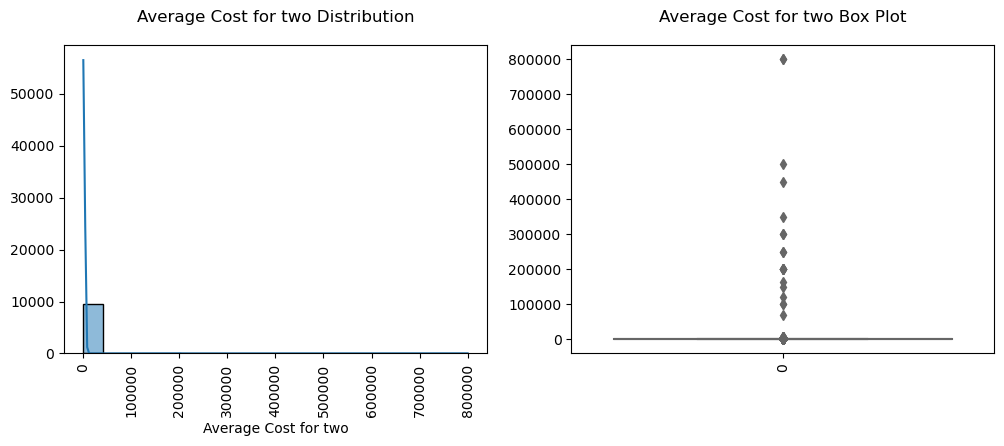

Skewness of Average Cost for two : 35.477914900871276


In [24]:
col = 'Average Cost for two'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)
axes[0].tick_params(axis='x', rotation=90)  
axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)
axes[1].tick_params(axis='x', rotation=90)  

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

Our analysis of the "Average Cost for Two" feature indicates a right skew in its distribution. This is supported by a skewness coefficient of 35.4779. Additionally, the boxplot visualization reveals the presence of outliers within the data for this feature.

## 1.2 Price range feature

In [25]:
def show_percentage(ax, total, fontsize=10):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f}%"
        x = p.get_x() + p.get_width() / 2 + 0.04
        y = p.get_height()
        ax.annotate(percentage, (x , y + 80), fontsize=fontsize, ha='center')

In [26]:
df['Price range'].value_counts().to_frame()

,count
Price range,
1,4444
2,3113
3,1408
4,586


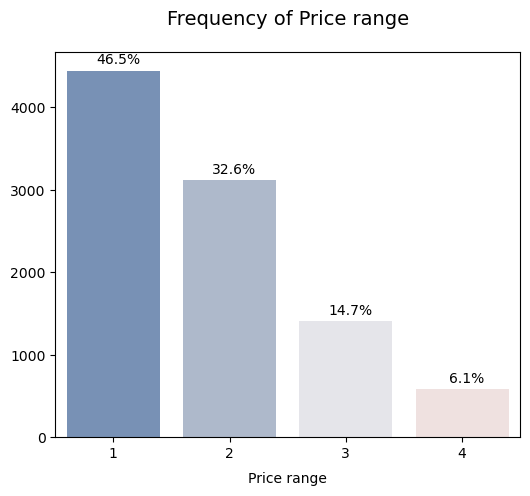

In [31]:
sns.set_palette('vlag')
col = 'Price range'
plt.figure(figsize=(6,5))
ax = sns.countplot(x=col, data=df)
show_percentage(ax, len(df)) 

plt.xlabel(col, size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

An examination of the target variable, "Price Range," revealed a class imbalance within the dataset. Price range 1 boasts the highest number of entries (4,444 entries, constituting 46.5% of the data). This is followed by price range 2 (3,113 entries, 32.6%), price range 3 (1,408 entries, 14.7%), and lastly, price range 4 (586 entries, 6.1%). This distribution highlights a significant skew towards the lower price ranges.

## 1.3 Independent variables

Categorical columns

In [33]:
for i,col in enumerate(categorical_col + num_cat_col[1:]):
    print(f"{i+1}. {col}:   {df[col].nunique()} unique values")

1. Restaurant Name:   7446 unique values
2. City:   141 unique values
3. Locality:   1208 unique values
4. Locality Verbose:   1265 unique values
5. Cuisines:   1825 unique values
6. Currency:   12 unique values
7. Has Table booking:   2 unique values
8. Has Online delivery:   2 unique values
9. Is delivering now:   2 unique values
10. Rating color:   6 unique values
11. Rating text:   6 unique values
12. Country:   15 unique values
13. Aggregate rating:   33 unique values


Several categorical features within the dataset exhibit high cardinality, presenting challenges for data visualization: "Restaurant Name" (1), "Locality" (3), "Locality Verbose" (4), and "Cuisines" (5). Due to this high number of unique values, these features will not be directly analyzed through visualizations. Instead, we will focus on alternative techniques like feature engineering and other dimensionality reduction strategies to address the high cardinality in following sections.

This column also exhibits high cardinality. To address this, we plan to visualize the counts for the top 10 most representative cities and list the counts for the remaining 131 cities. This approach aims to provide a concise representation of the data while highlighting the prevalence of the most frequent cities.

Text(0.5, 1.05, 'Frequency of City')

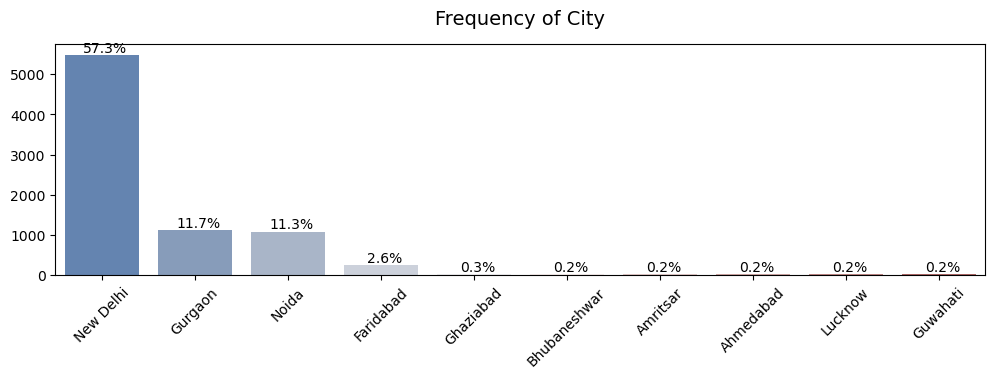

In [36]:
col = 'City'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()
ax = sns.barplot(x=df_counts[:10].index, y=df_counts[:10].values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=45)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

In [37]:
display(df_counts[11:])

City
Rest of Hawaii      20
Kochi               20
Kolkata             20
Pocatello           20
Pensacola           20
                    ..
Panchkula            1
Mc Millan            1
Mayfield             1
Macedon              1
Vineland Station     1
Name: count, Length: 130, dtype: int64

The dataset encompasses observations from 141 distinct cities. Notably, New Delhi exhibits a significant representation, accounting for 57.3% of the total data. Following New Delhi, the distribution features Gurgaon (11.7%), Noida (11.3%), and Faridabad (2.6%), each with a considerable presence. The remaining cities constitute a smaller proportion, with Guwahati, Ludhiana, Ahmedabad, Amritsar, and Bhubaneswar each contributing 0.2% or less to the overall data.

#### Currency

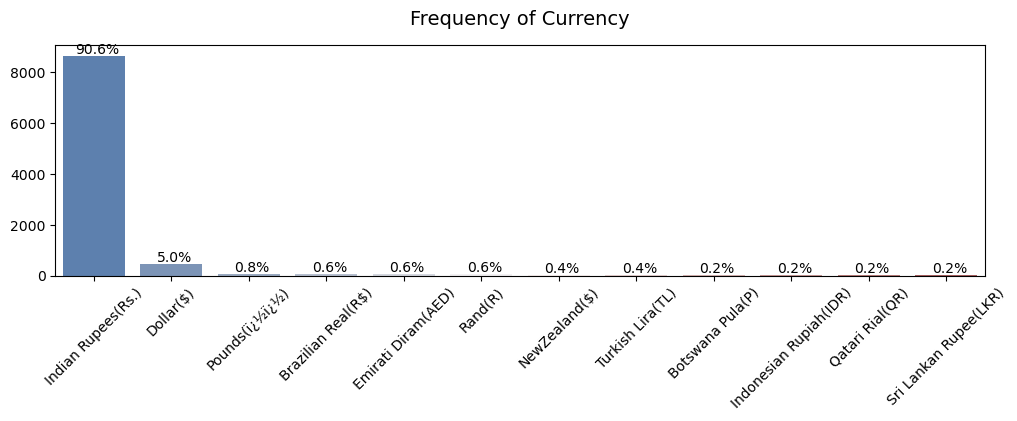

In [38]:
col = 'Currency'
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=45)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

The analysis of currency distribution revealed the Indian Rupee (INR) as the dominant currency, accounting for a substantial 90.6% of all occurrences. Following this, the US Dollar (USD) is present at a rate of 5.0%, while the British Pound (GBP) constitutes 0.8% of the data. The remaining currencies hold minimal representation, with the Botswana Pula (BWP), Indonesian Rupiah (IDR), Qatari Rial (QAR), and Sri Lankan Rupee (LKR) each appearing in only 0.2% of the observations.

#### Has Table booking

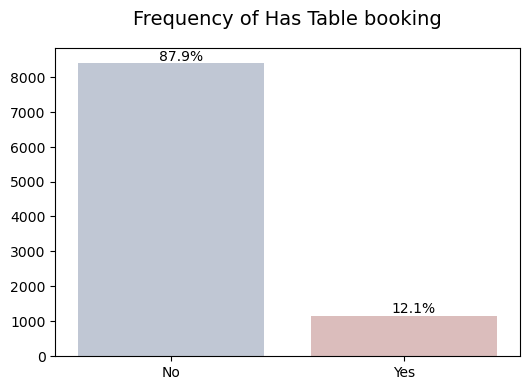

In [40]:
col = 'Has Table booking'
plt.figure(figsize=(6, 4))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

Our examination of the data revealed that a significant portion (87.9%) of the observations do not offer table booking functionality. Conversely, only 12.1% of the establishments allow table bookings.

#### Is delivering now

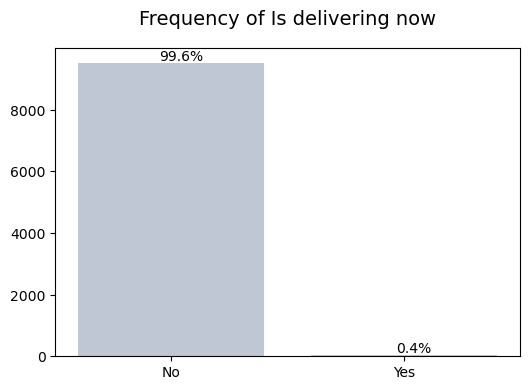

In [42]:
col = 'Is delivering now'
plt.figure(figsize=(6, 4))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=0)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

The data analysis suggests a limited online delivery presence. A substantial 99.6% of observations indicate "No" for the feature "is delivering now," signifying a lack of immediate delivery services. Only a minimal portion (0.4%) of establishments offer online delivery at the time of data collection.

#### Rating color

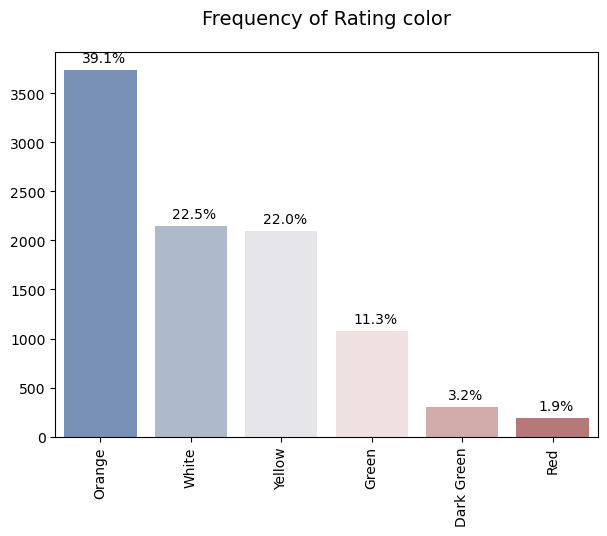

In [45]:
col = 'Rating color'
plt.figure(figsize=(7, 5))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=90)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

Our exploration of the "rating color" distribution within the dataset revealed the following breakdown:

- Orange: 39.1%
- White: 22.5%
- Yellow: 22.0%
- Green: 11.3%
- Dark Green: 3.2%
- Red: 1.9%

### Rating text

Text(0.5, 1.05, 'Frequency of Rating text')

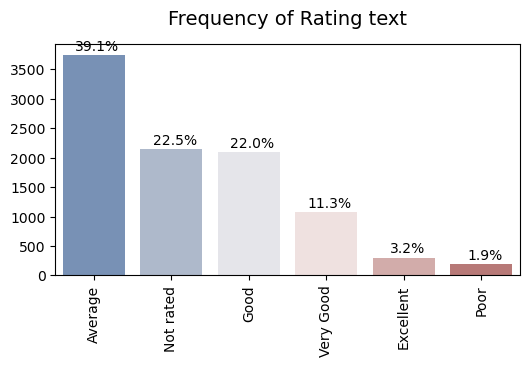

In [46]:
col = 'Rating text'
plt.figure(figsize=(6, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=90)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05)

An examination of the "rating text" distribution revealed a close correlation with the "rating color" variable. The breakdown is as follows:

- Average: 39.1%
- Not Rated: 22.5%
- Good: 22.0%
- Very Good: 11.3%
- Excellent: 3.2%
- Poor: 1.9%

#### Country 

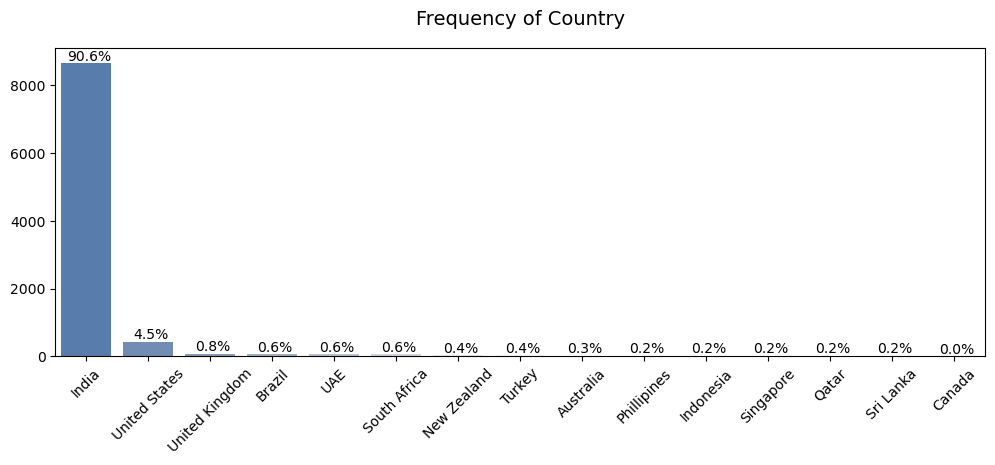

In [47]:
col = 'Country'
plt.figure(figsize=(12, 4))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df)) 

plt.xticks(rotation=45)
plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=14, y=1.05);

Our analysis of the "Country" or "Country Code" variable revealed India as the predominant location, accounting for a significant 90.6% of all observations. Following India, the United States is present at a rate of 5.0%, while the United Kingdom constitutes 0.8% of the data. The remaining countries hold minimal representation, with the Philippines, Indonesia, Singapore, Qatar, and Sri Lanka each appearing in only 0.2% of the observations. Notably, Canada is entirely absent from the dataset.

#### Aggregate rating

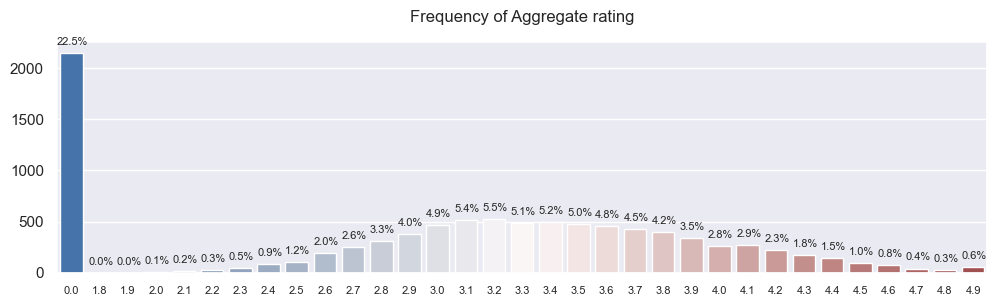

In [48]:
col = 'Aggregate rating'
sns.set(font_scale=1)
plt.figure(figsize=(12, 3))
df_counts = df[col].value_counts()

ax = sns.barplot(x=df_counts.index, y=df_counts.values, palette='vlag')
show_percentage(ax, len(df), fontsize=8) 

plt.xticks(rotation=0, size=8)
plt.xlabel('', size=10, labelpad=6)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of {col}", size=12, y=1.05);

Our examination of the 'Aggregate rating' variable, which represents the average rating on a 5-point scale, revealed a near-normal distribution. This feature encompasses 33 distinct values. It's noteworthy that a significant portion (approximately 22.5%) of the sample consists of zero ratings.

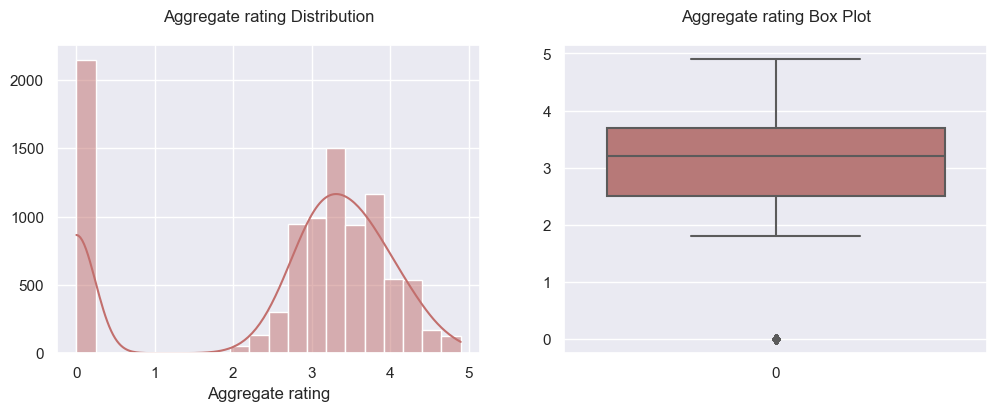

Skewness of Aggregate rating : -0.9541304733200109


In [49]:
col = 'Aggregate rating'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#c26f6d')
sns.boxplot(df[col], ax=axes[1], color='#c26f6d')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of MaxTemp
print(f"Skewness of {col} : {df[col].skew()}")

#### Numerical columns

In [50]:
for i,col in enumerate(numerical_col):
    print(f"{i+1}. {col}")

1. Longitude
2. Latitude
3. Votes


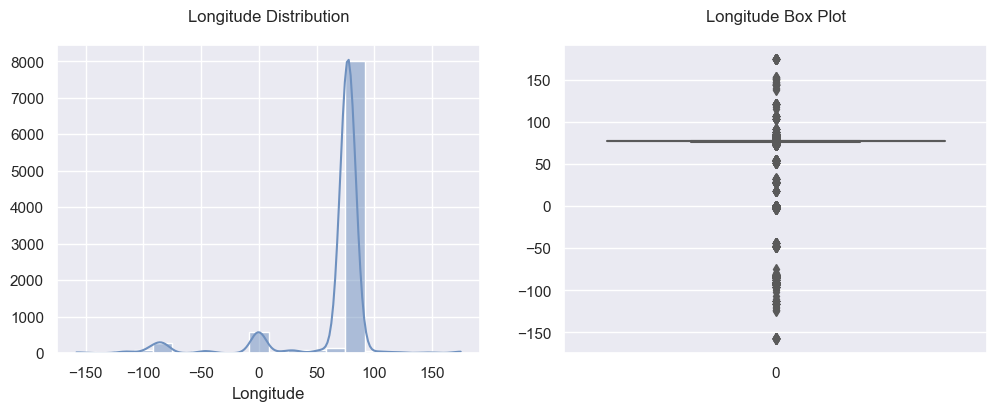

Skewness of Longitude : -2.8073278338140857


In [51]:
col = 'Longitude'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#6e90bf')
sns.boxplot(df[col], ax=axes[1], color='#6e90bf')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of MinTemp
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'Longitude' exhibits a slight leftward skewness. A Box plot indicates the presence of outliers in this variable. It is essential to analyze this feature in conjunction with 'Latitude' since together represent the geographical location.

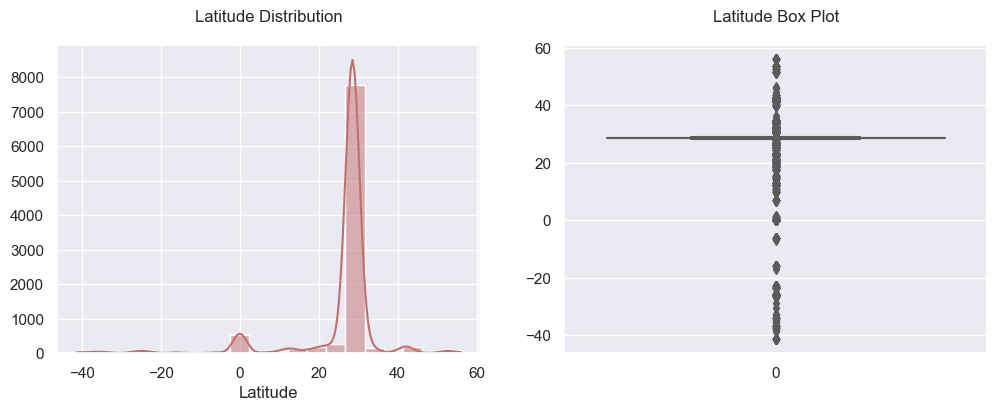

Skewness of Latitude : -3.08163535060857


In [52]:
col = 'Latitude'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#c26f6d')
sns.boxplot(df[col], ax=axes[1], color='#c26f6d')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of MaxTemp
print(f"Skewness of {col} : {df[col].skew()}")

Analysis of the 'Latitude' variable suggests a left-skewed distribution. This finding is further supported by the presence of outliers identified in the boxplot visualization. It's crucial to consider 'Latitude' in conjunction with 'Longitude' as these features together represent geographical coordinates.

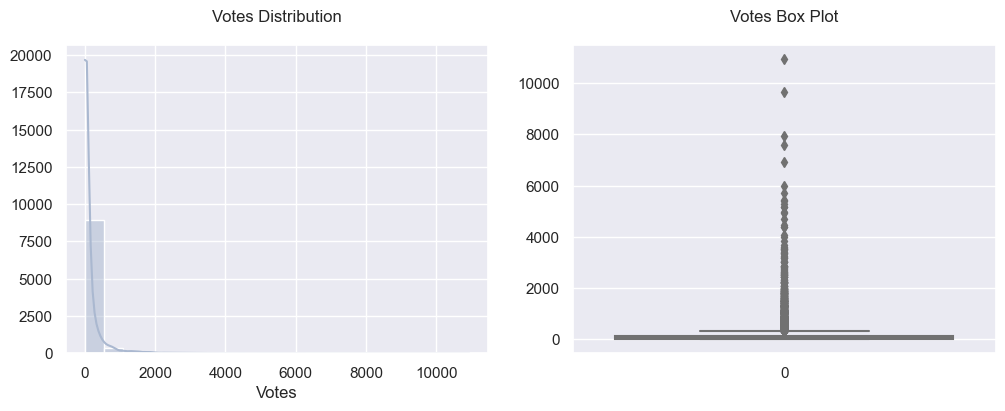

Skewness of Votes : 8.807636687709472


In [53]:
col = 'Votes'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.color_palette("vlag", as_cmap=True)

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='#aab8d0')
sns.boxplot(df[col], ax=axes[1], color='#aab8d0')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Evaporation
print(f"Skewness of {col} : {df[col].skew()}")

#### Univariate Boxplot

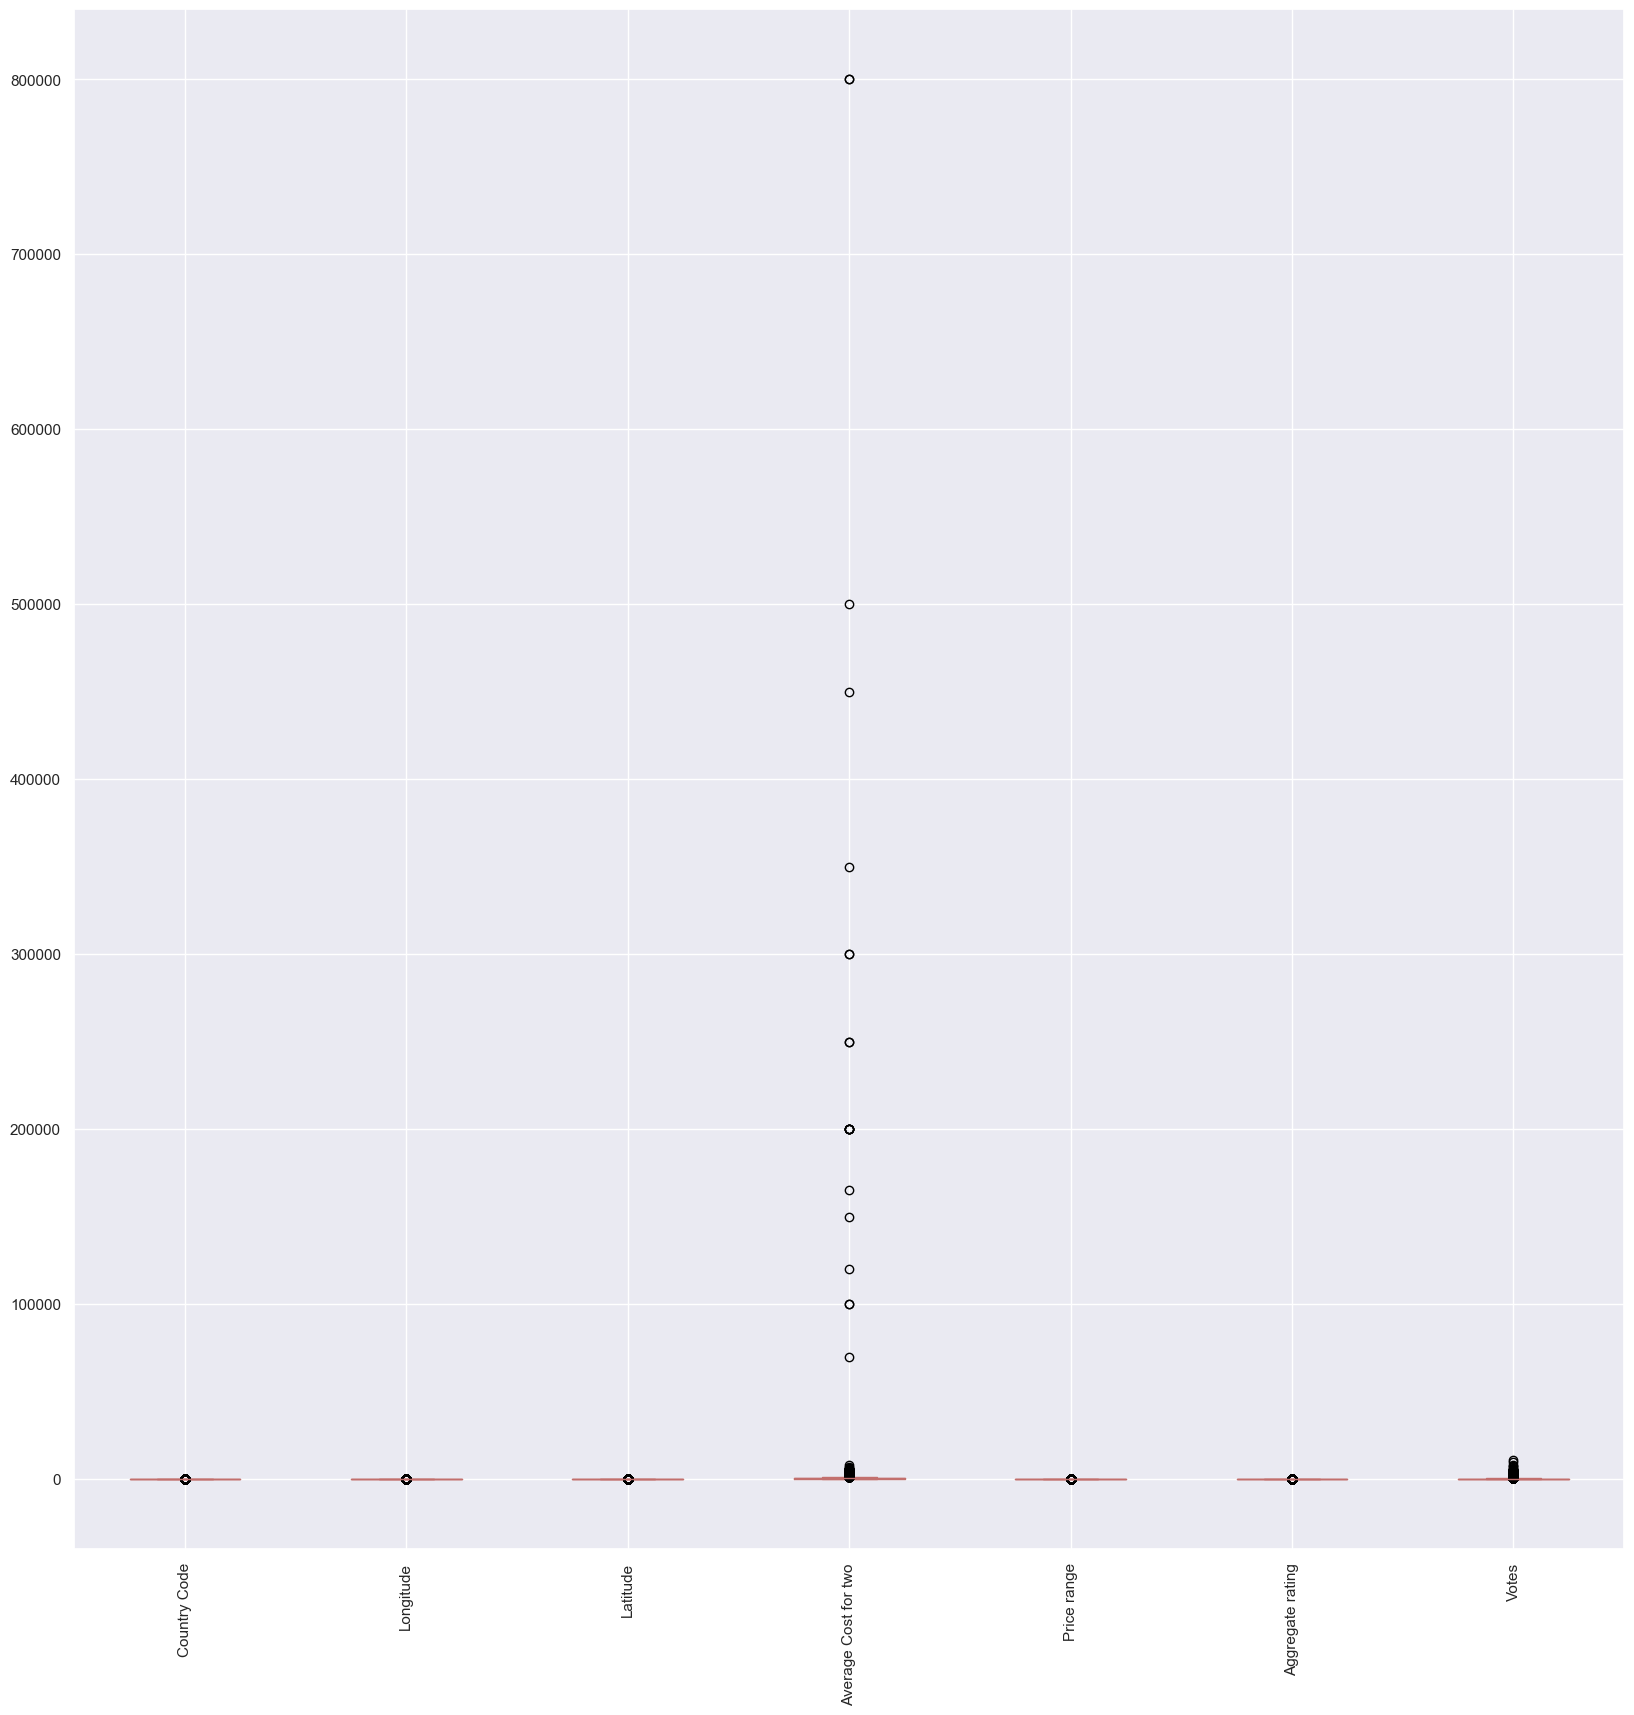

In [54]:
df.boxplot(figsize=(20,20), color='#c26f6d')
plt.xticks(rotation=90)
plt.show()

## 2. Bivariate Analysis

### 2.1 BoxPlot Analysis: Finding outliers and comparing

In [55]:
def boxplot_by_category(col, category_col, xlabel, cat_label, figsize, palette, xscale=''):
    plt.figure(figsize=figsize)
    sns.set_palette(palette)
    sns.boxplot(data=df, x=col, y=category_col)
    plt.ylabel(cat_label)
    plt.xlabel(xlabel)
    if xscale != '':
        plt.xscale(xscale)
    plt.title(f"BoxPlot of {col} vs. {cat_label}")
    plt.show()

In [56]:
def plot_scatter_target_r_according_to(col, category_col, xlabel, title, palette):
    '''Draw a scatter plot comparing <col> with Rainfall variable and RainTomorrow.'''
    plt.figure(figsize=(8, 4))
    sns.set(font_scale=1)  

    # Plot scatterplot
    sns.scatterplot(x=col, y='Average Cost for two', hue=category_col, data=df, palette=palette)

    # visual presentation
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1)).set_title(category_col)
    plt.xlabel(xlabel)
    plt.ylabel('Average Cost for two')
    plt.title(f'{title} vs. Average Cost for two according to {category_col}')
    plt.show()

### Average Cost for two distribution according to Rating

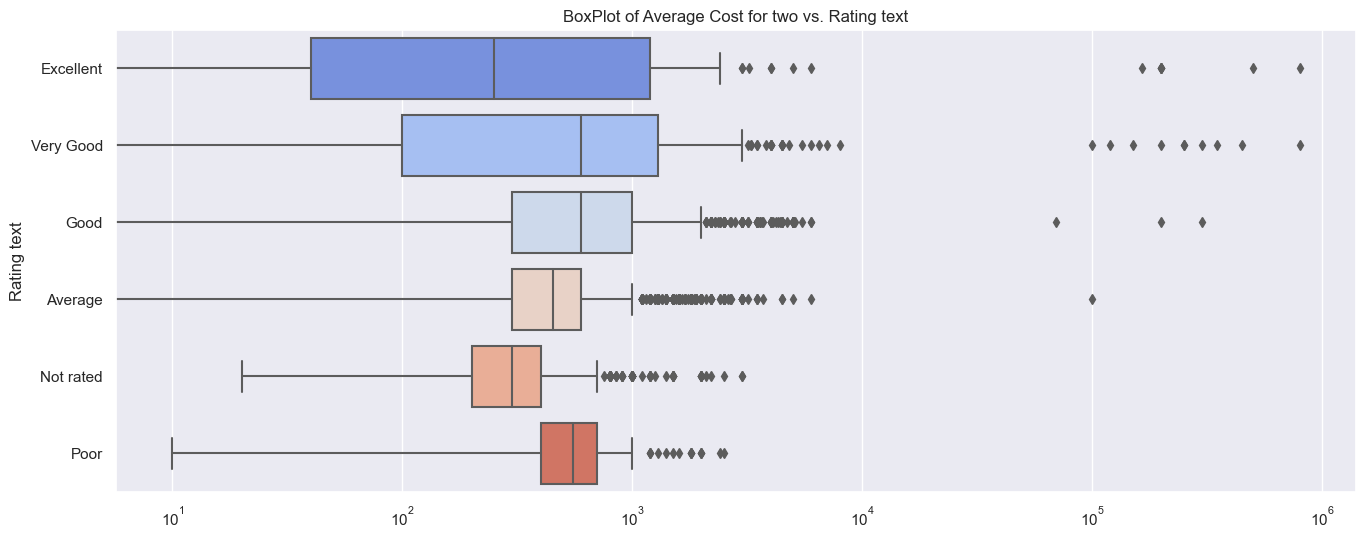

In [57]:
col = 'Average Cost for two'
category_col= 'Rating text'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,6), palette='coolwarm', xscale='log')

### Average Cost for two distribution according to Has Table booking

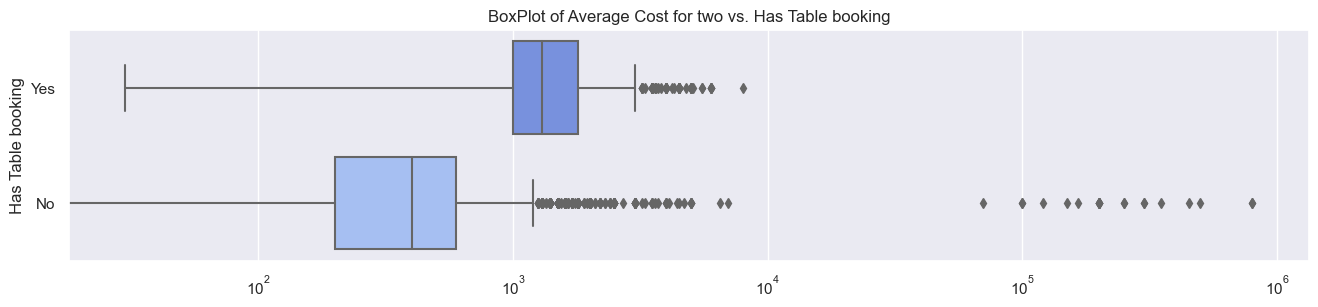

In [58]:
col = 'Average Cost for two'
category_col= 'Has Table booking'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,3), palette='coolwarm', xscale='log')

#### Average Cost for two distribution according to Has Online delivery

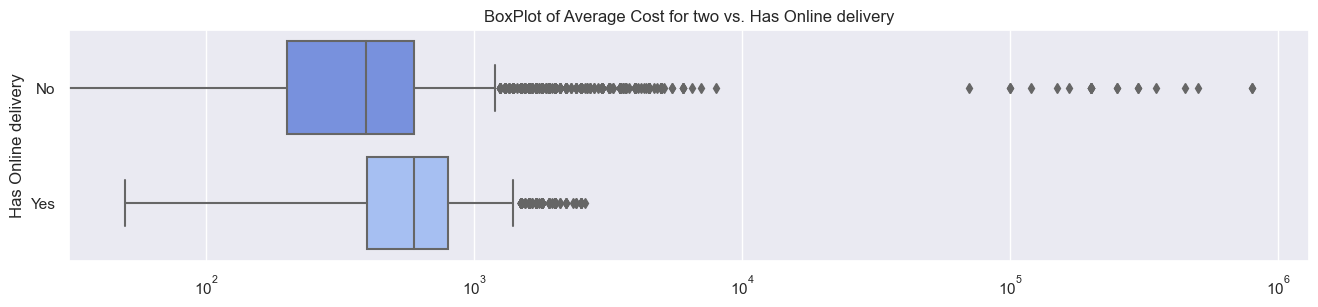

In [59]:
col = 'Average Cost for two'
category_col= 'Has Online delivery'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,3), palette='coolwarm', xscale='log')

#### Average Cost for two distribution according to Is delivering now

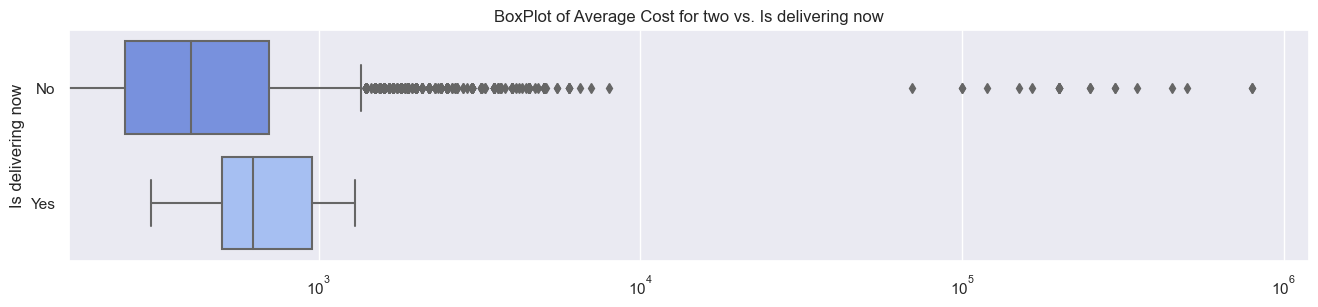

In [60]:
col = 'Average Cost for two'
category_col= 'Is delivering now'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,3), palette='coolwarm', xscale='log')

#### Average Cost for two distribution according to Country

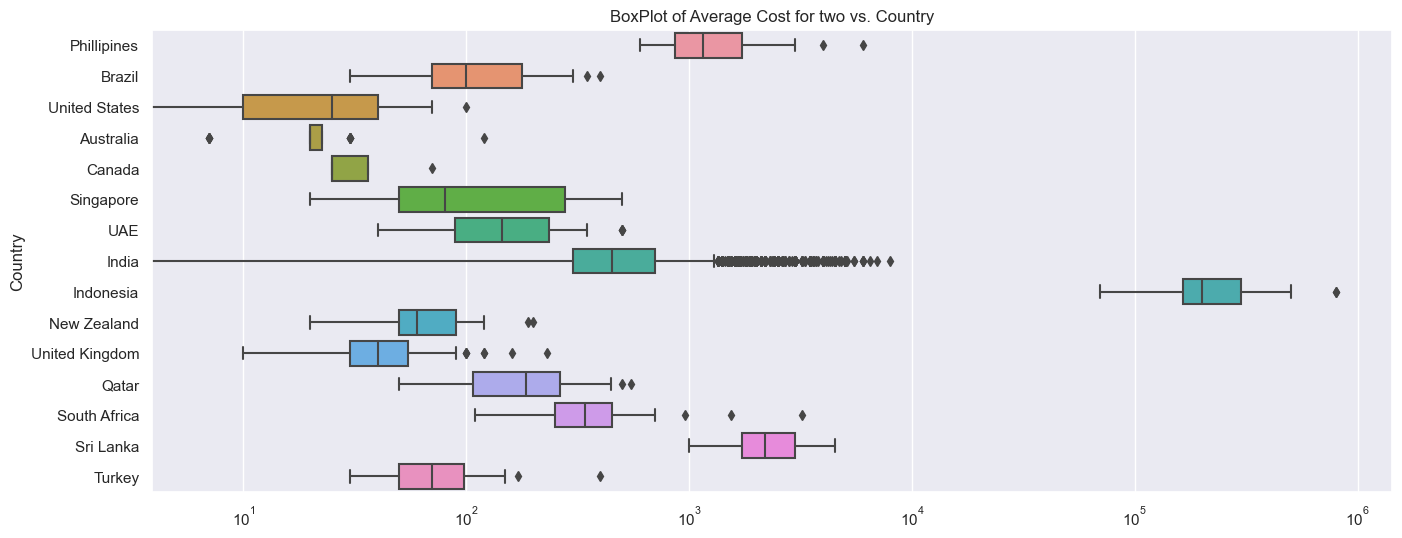

In [61]:
col = 'Average Cost for two'
category_col= 'Country'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,6), palette='coolwarm', xscale='log')

#### Votes distribution according to Rating

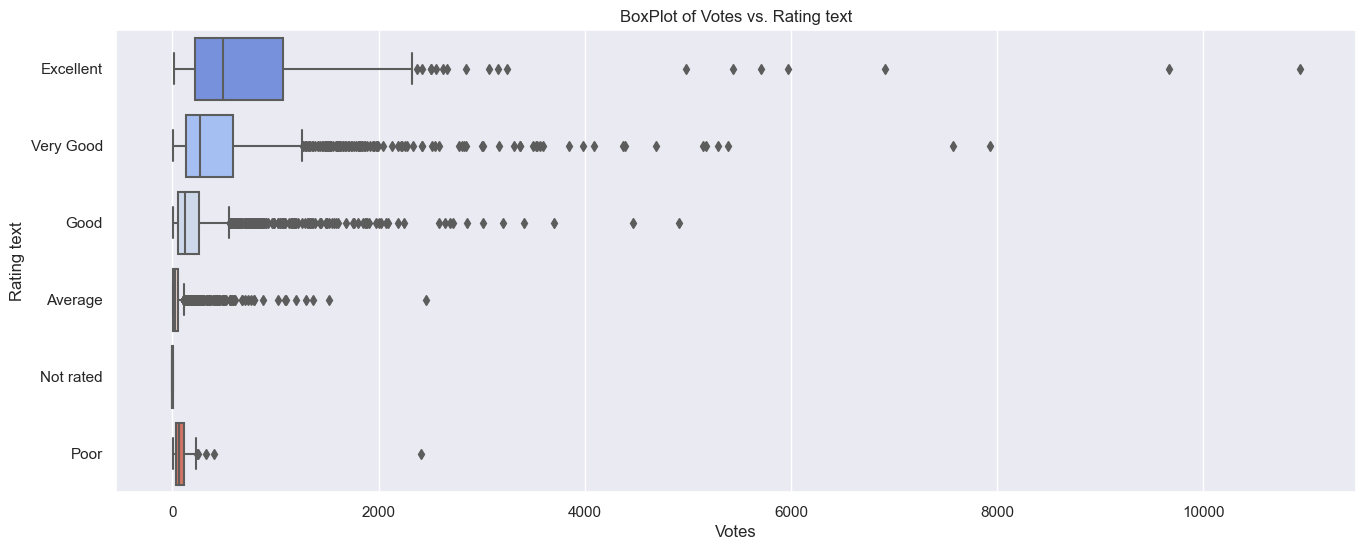

In [62]:
col = 'Votes'
category_col= 'Rating text'

boxplot_by_category(col, category_col,  xlabel='Votes', cat_label=category_col, figsize=(16,6), palette='coolwarm')

#### Votes distribution according to Has Table booking

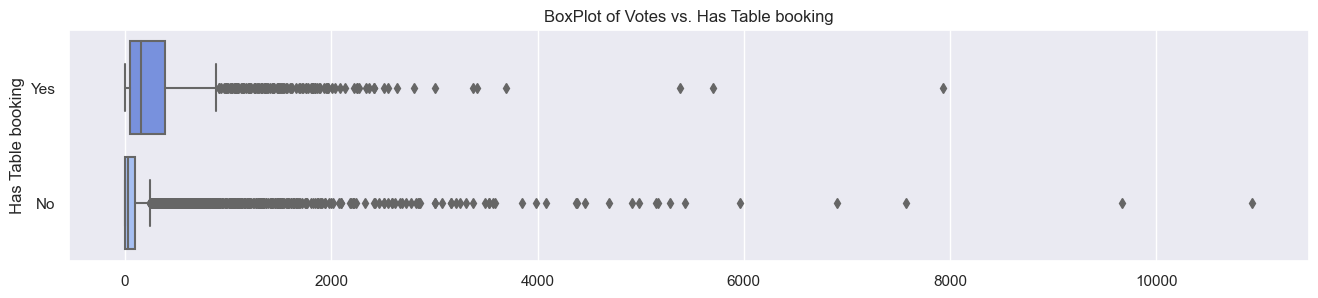

In [63]:
col = 'Votes'
category_col= 'Has Table booking'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,3), palette='coolwarm')

#### Votes distribution according to Has Online delivery

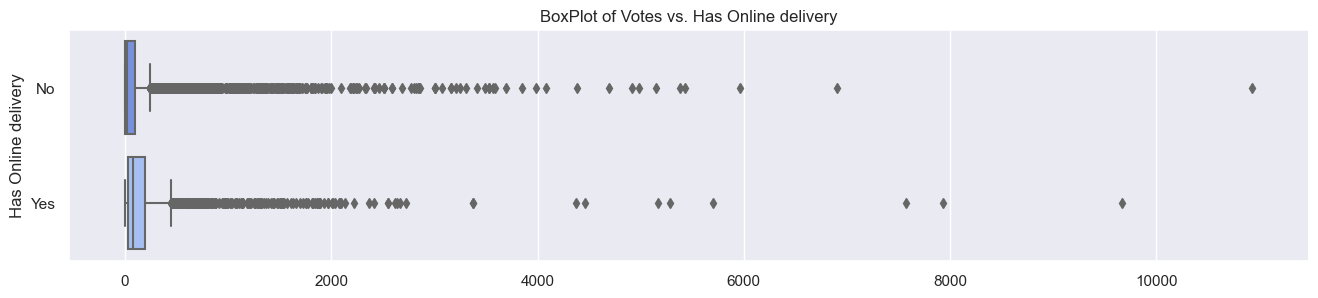

In [64]:
col = 'Votes'
category_col= 'Has Online delivery'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,3), palette='coolwarm')

#### Votes distribution according to Is delivering now

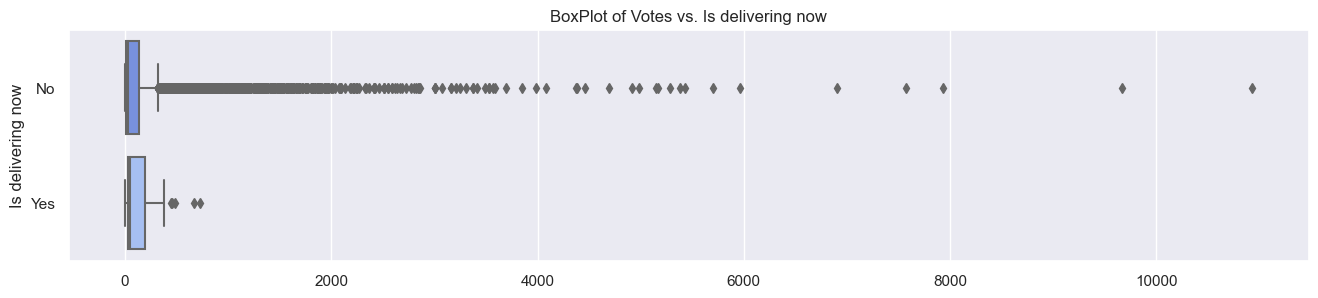

In [65]:
col = 'Votes'
category_col= 'Is delivering now'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,3), palette='coolwarm')

#### Votes distribution according to Country

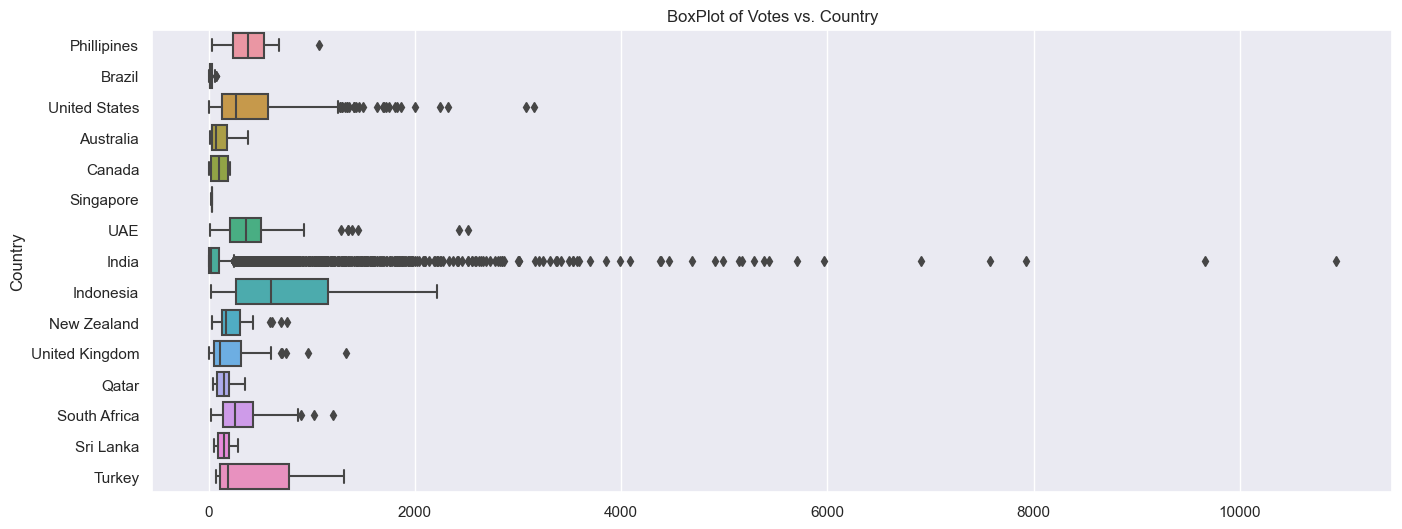

In [66]:
col = 'Votes'
category_col= 'Country'

boxplot_by_category(col, category_col,  xlabel='', cat_label=category_col, figsize=(16,6), palette='coolwarm')

### Comparing Average Cost with Votes

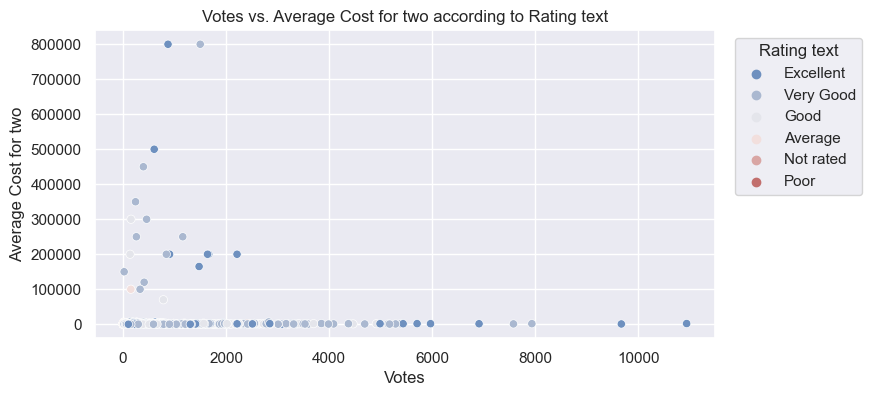

In [67]:
col = 'Votes'
plot_scatter_target_r_according_to(col, category_col='Rating text', xlabel=col, title=col, palette='vlag')

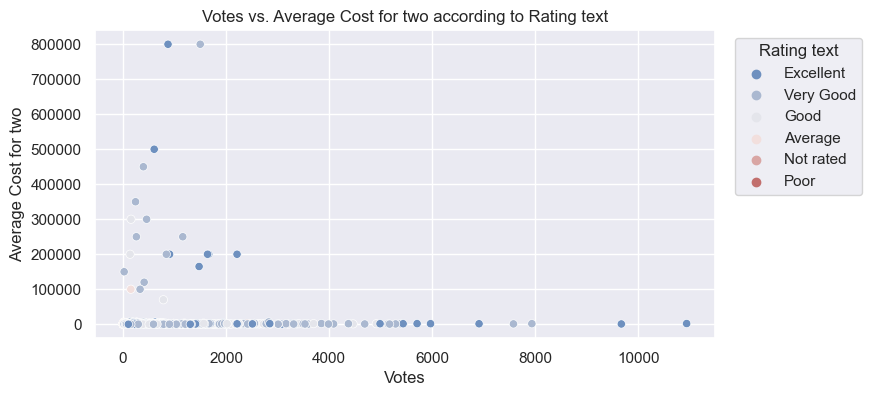

In [68]:
col = 'Votes'
plot_scatter_target_r_according_to(col, category_col='Rating text', xlabel=col, title=col, palette='vlag')

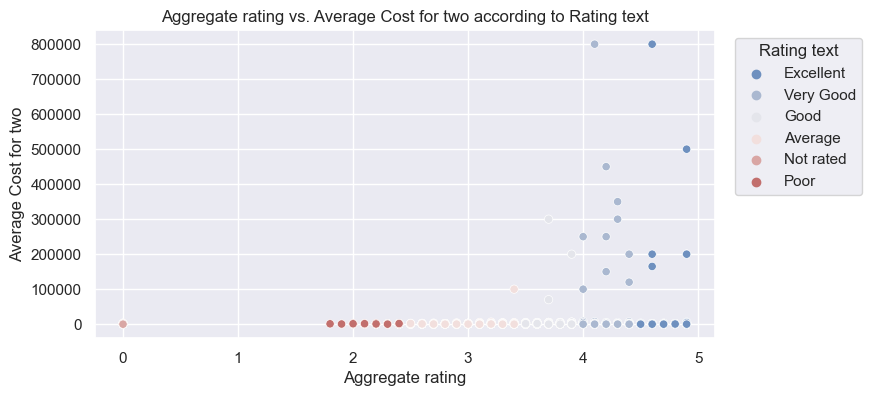

In [69]:
col = 'Aggregate rating'
plot_scatter_target_r_according_to(col, category_col='Rating text', xlabel=col, title=col, palette='vlag')

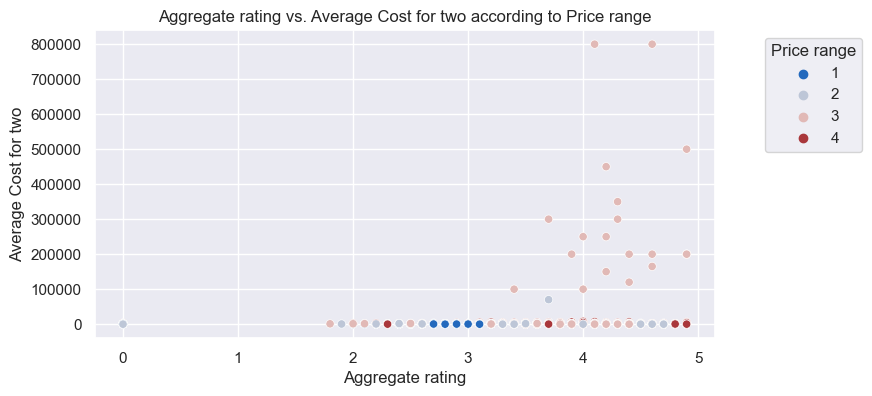

In [70]:
col = 'Aggregate rating'
plot_scatter_target_r_according_to(col, category_col='Price range', xlabel=col, title=col, palette='vlag')

### Average Cost for two according to the Country and Price Range

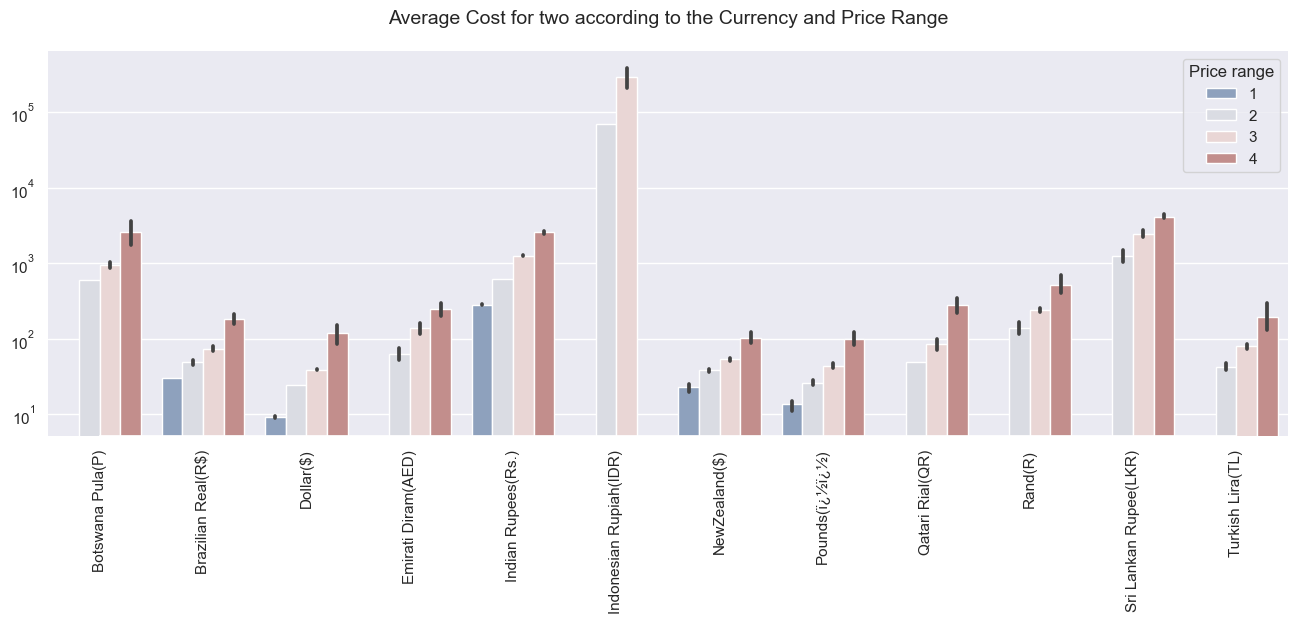

In [72]:
plt.figure(figsize=(16,5))
sns.barplot(x='Currency', y='Average Cost for two', hue='Price range', data= df, palette='vlag')

# visual presentation
sns.despine(trim=True, left=True)
plt.ylabel('')
plt.xlabel('')
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Average Cost for two according to the Currency and Price Range', size=14, y=1.05)
plt.show()

### Aggregate rating according to Country and Rating

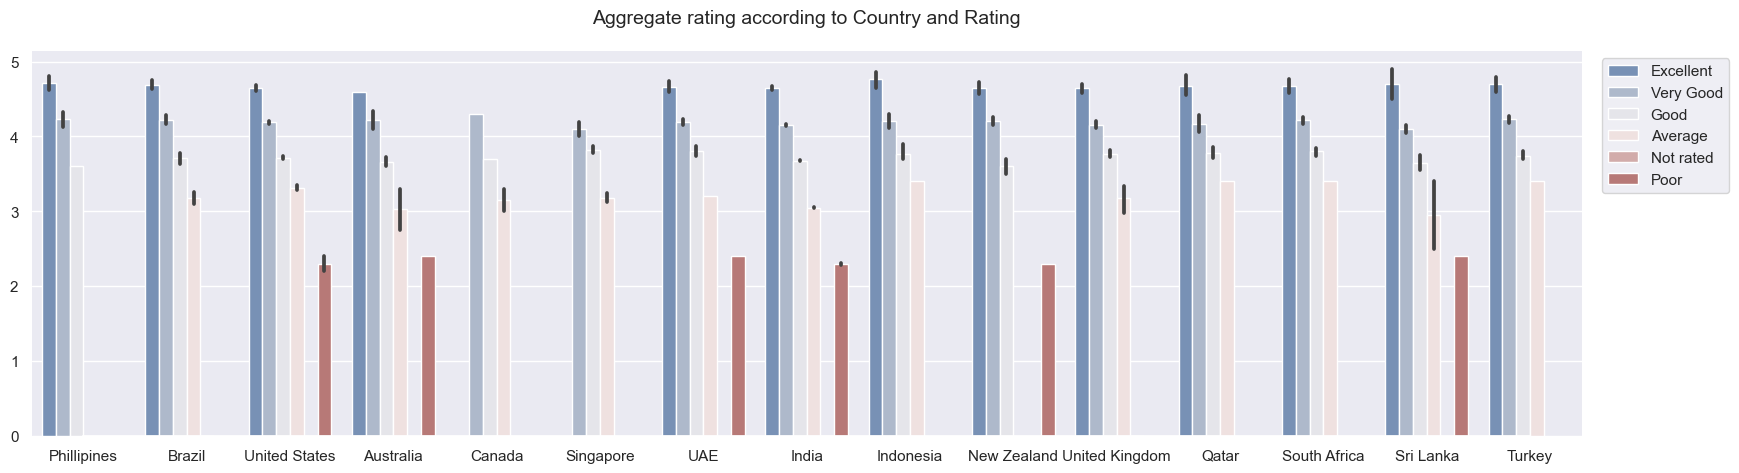

In [73]:
plt.figure(figsize=(20,5))
sns.barplot(x='Country', y='Aggregate rating', hue='Rating text', data= df, palette='vlag')

# visual presentation
sns.despine(trim=True, left=True)
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1)).set_title('')
plt.title('Aggregate rating according to Country and Rating', size=14, y=1.05)
plt.show()

### Restaurant location categorized by Price range

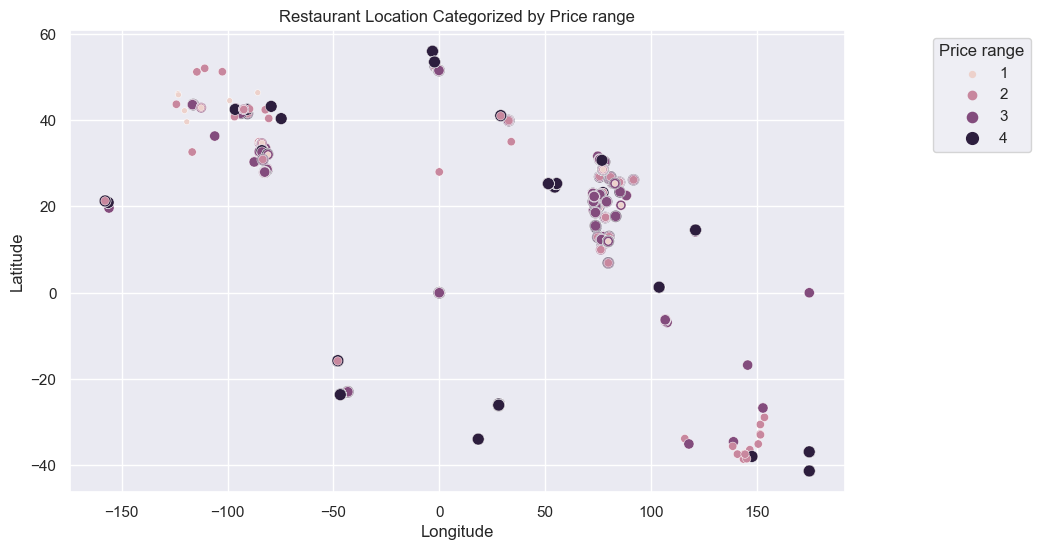

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Price range', size='Price range', data=df)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1)).set_title('Price range')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Location Categorized by Price range')
plt.show()

A geospatial visualization was previously created to represent the distribution of restaurants across the target variable "Price Range." This map provides insights into the spatial patterns of restaurants within different price categories.

## Multivariate Analysis

### Pairplot

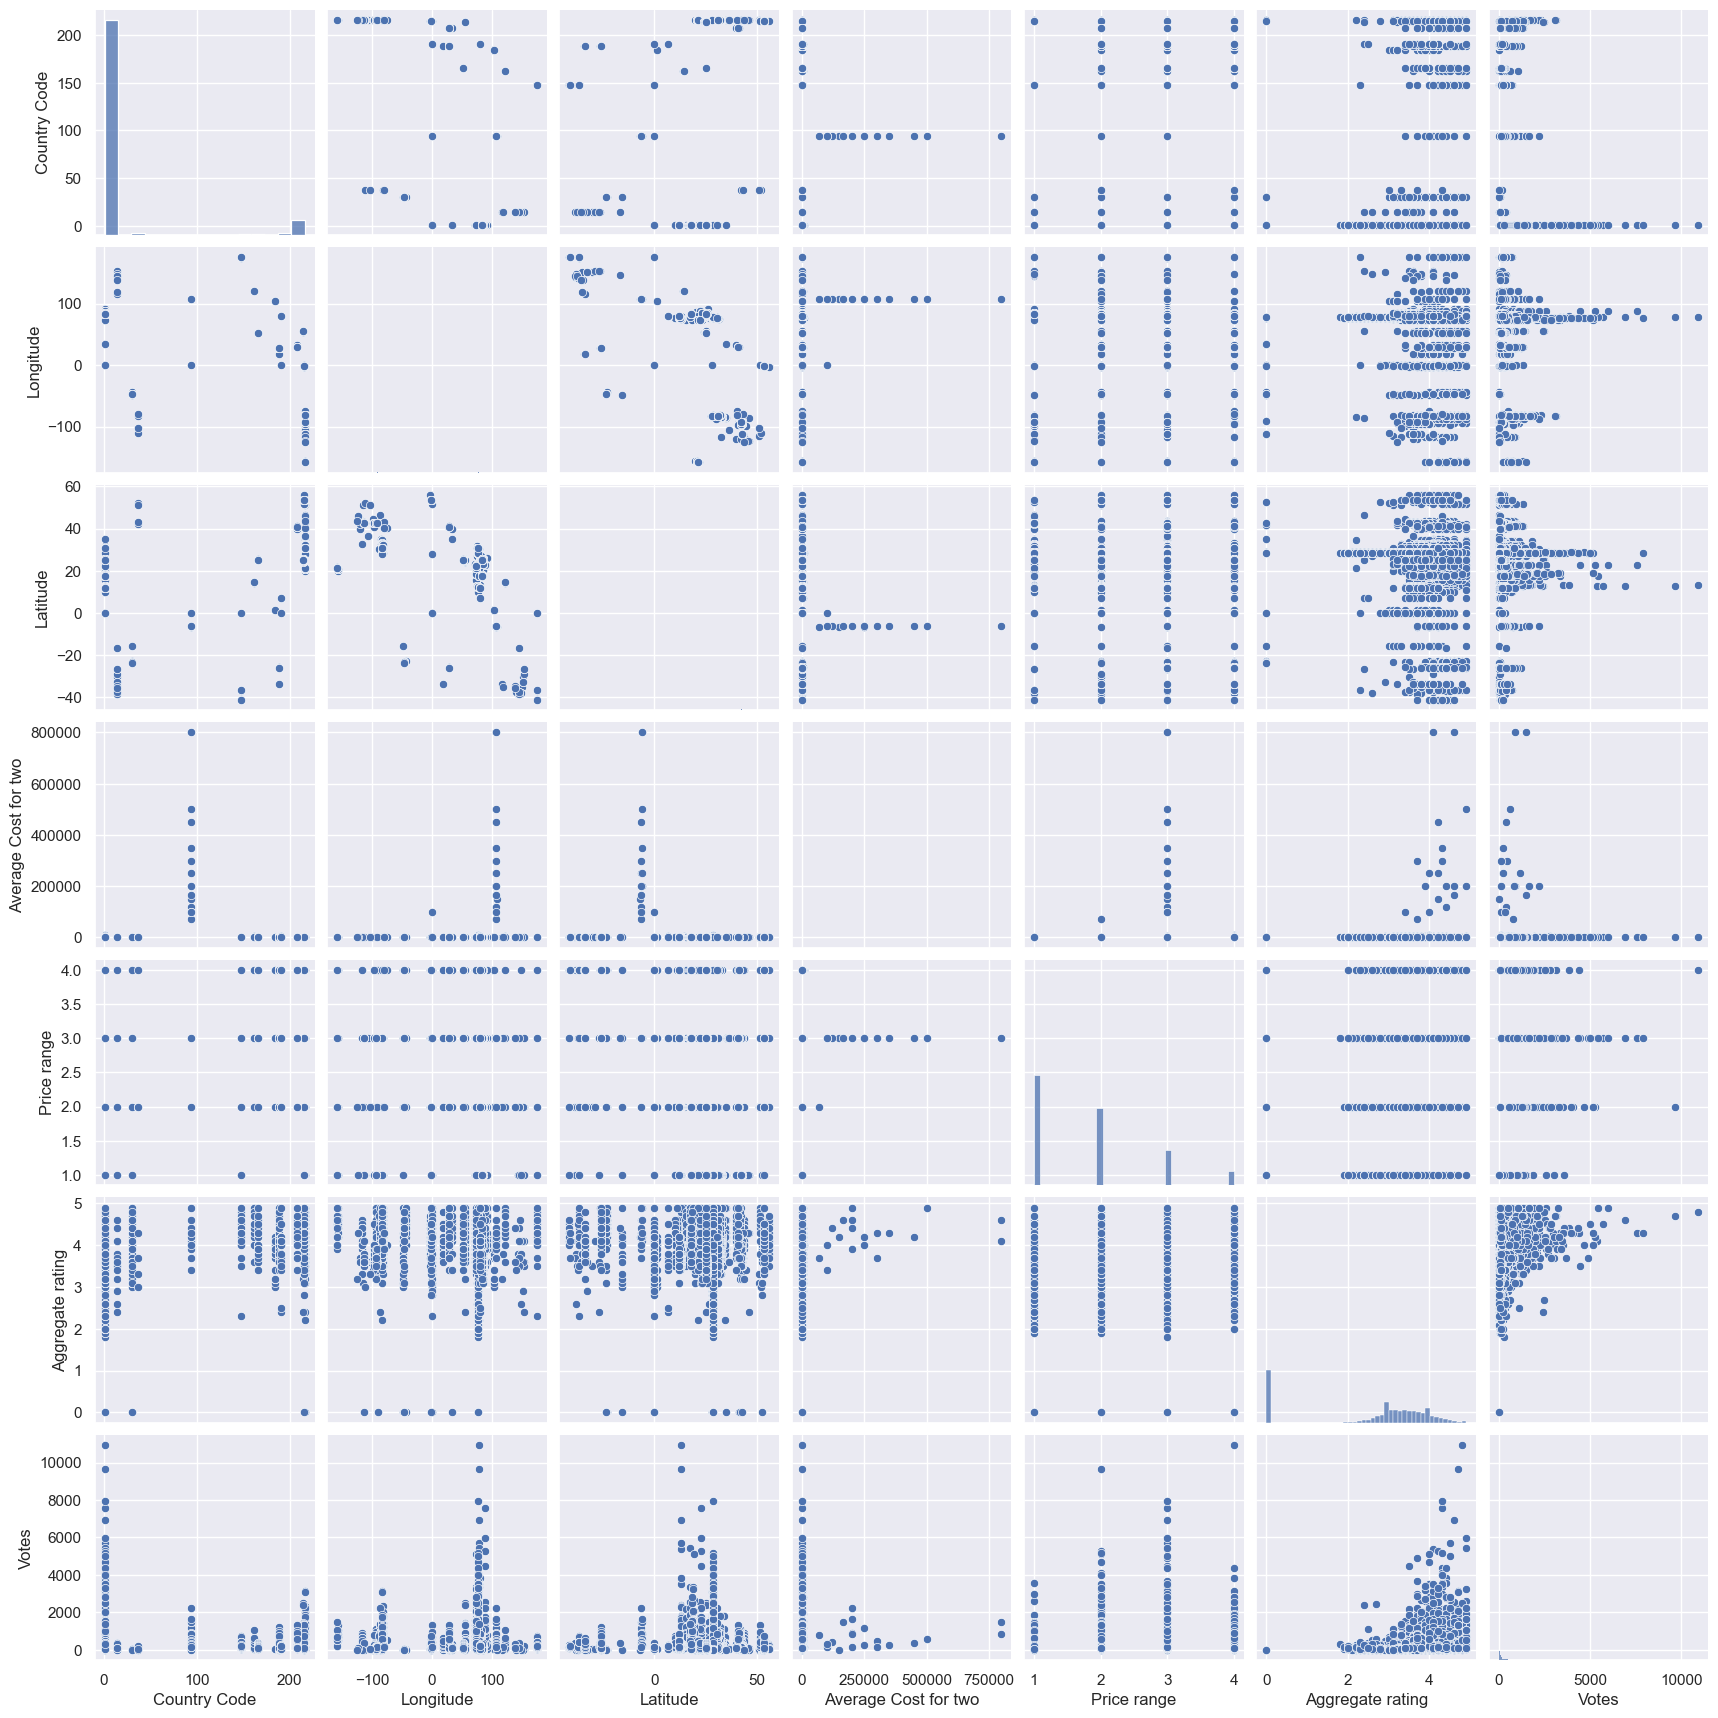

In [75]:
sns.pairplot(df)

The exploration of relationships between variables revealed the following:

Average Cost for Two:
- Exhibits a moderate positive correlation with 'Votes,' 'Price Range,' and 'Country Code.' This suggests a tendency for restaurants with higher average cost for two to also have more votes, belong to higher price ranges, and potentially be located in specific countries.

Price Range:
- Demonstrates a weak positive correlation with 'Votes,' 'Average Cost for Two,' and 'Country Code.' This indicates a possible, but less pronounced, association between higher price ranges and restaurants with more votes, higher average cost for two, and specific country locations.

### Treating the Missing Values

In [78]:
missing_val = df.isnull().sum().to_frame("Null values")

missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

,Null values,% of missing
Restaurant Name,0,0.00
Country Code,0,0.00
City,0,0.00
Locality,0,0.00
Locality Verbose,0,0.00
Longitude,0,0.00
Latitude,0,0.00
Cuisines,9,0.09
Average Cost for two,0,0.00
Currency,0,0.00


In [79]:
missing_val[(missing_val['% of missing'] > 0) & (missing_val['% of missing']<2)]

,Null values,% of missing
Cuisines,9,0.09


In [80]:
df_new = df.dropna(subset=['Cuisines'])

print(f"{df.shape[0] - df_new.shape[0]} rows with missing values were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()

9 rows with missing values were deleted.
This represent 0.09% of the data.
In the new dataset there are 9542 rows and 19 columns.


Our data cleaning process involved addressing missing values. For features with a missing data percentage below 2%, we opted for imputation techniques to minimize data loss. This strategy resulted in a negligible data loss of only 0.09%.

## Fequency-Based Encoding Restaurant Name

In [81]:
frequency_map = df['Restaurant Name'].value_counts(normalize=True).to_dict()

# Create a new column with the frequency-based encoding
df['RestaurantName_enc'] = df['Restaurant Name'].map(frequency_map)

# Display the result
print(df[['RestaurantName_enc', 'Restaurant Name']].head())
print(f"\nCounts for Restaurant Name Encoded feature:\n{df['RestaurantName_enc'].value_counts()}\n")
print(f"Unique values in Restaurant Name: {df['Restaurant Name'].nunique()}")
print(f"Unique values in Restaurant Name Encoded: {df['RestaurantName_enc'].nunique()}")

   RestaurantName_enc         Restaurant Name
0            0.000105        Le Petit Souffle
1            0.000105        Izakaya Kikufuji
2            0.000105  Heat - Edsa Shangri-La
3            0.000105                    Ooma
4            0.000105             Sambo Kojin

Counts for Restaurant Name Encoded feature:
RestaurantName_enc
0.000105    6703
0.000210     936
0.000314     324
0.000419     184
0.000524     140
0.000629     108
0.000734      91
0.008698      83
0.008279      79
0.001991      76
0.001886      72
0.002306      66
0.006602      63
0.000838      56
0.001467      56
0.000943      54
0.005345      51
0.005030      48
0.002096      40
0.001362      39
0.001258      36
0.003563      34
0.001153      33
0.001677      32
0.003144      30
0.003039      29
0.002934      28
0.002725      26
0.001572      15
0.001048      10
Name: count, dtype: int64

Unique values in Restaurant Name: 7437
Unique values in Restaurant Name Encoded: 30


The application of frequency-based encoding on the 'Restaurant Name' feature proved successful in reducing its cardinality. This technique effectively minimized the number of unique values from 7,437 to a more manageable set of 30. Following this step, features deemed unnecessary for subsequent analysis will be removed from the dataset.

In [82]:
cols_to_drop = ['Restaurant Name']
print(f"Columns will be dropped later: {cols_to_drop}")

Columns will be dropped later: ['Restaurant Name']


In [83]:
frequency_map

{'Cafe Coffee Day': 0.008698386082582268,
 "Domino's Pizza": 0.008279186753301195,
 'Subway': 0.006602389436176902,
 'Green Chick Chop': 0.0053447914483336825,
 "McDonald's": 0.0050303919513728776,
 'Keventers': 0.0035631942988891218,
 'Pizza Hut': 0.0031439949696080486,
 'Giani': 0.0030391951372877803,
 'Baskin Robbins': 0.002934395304967512,
 'Barbeque Nation': 0.0027247956403269754,
 "Giani's": 0.002305596311045902,
 'Barista': 0.002305596311045902,
 "Dunkin' Donuts": 0.002305596311045902,
 'Pind Balluchi': 0.0020959966464053656,
 'Costa Coffee': 0.0020959966464053656,
 'Wah Ji Wah': 0.0019911968140850973,
 'Twenty Four Seven': 0.0019911968140850973,
 'Sagar Ratna': 0.0019911968140850973,
 'Pizza Hut Delivery': 0.0019911968140850973,
 'Starbucks': 0.0018863969817648292,
 'KFC': 0.0018863969817648292,
 'Republic of Chicken': 0.0018863969817648292,
 'Chaayos': 0.0018863969817648292,
 "Haldiram's": 0.0016767973171242926,
 'Burger King': 0.0016767973171242926,
 'Shree Rathnam': 0.001571

### Locality and Locality Verbose Columns

In [84]:
frequency_map_loc = df['Locality'].value_counts(normalize=True).to_dict()

# Create a new column with the frequency-based encoding
df['Locality_enc'] = df['Locality'].map(frequency_map_loc)

# Display the result
print(df[['Locality_enc', 'Locality']].head())
print(f"\nCounts for Restaurant Name Encoded feature:\n{df['Locality_enc'].value_counts()}\n")
print(f"Unique values in Restaurant Name: {df['Locality'].nunique()}")
print(f"Unique values in Restaurant Name Encoded: {df['Locality_enc'].nunique()}")

   Locality_enc                                    Locality
0      0.000105   Century City Mall, Poblacion, Makati City
1      0.000105  Little Tokyo, Legaspi Village, Makati City
2      0.000105  Edsa Shangri-La, Ortigas, Mandaluyong City
3      0.000314      SM Megamall, Ortigas, Mandaluyong City
4      0.000314      SM Megamall, Ortigas, Mandaluyong City

Counts for Restaurant Name Encoded feature:
Locality_enc
0.000105    550
0.000210    344
0.000314    309
0.006288    240
0.000524    210
           ... 
0.002306     44
0.003668     35
0.003563     34
0.001153     33
0.003039     29
Name: count, Length: 82, dtype: int64

Unique values in Restaurant Name: 1206
Unique values in Restaurant Name Encoded: 82


In [85]:
cols_to_drop.append('Locality Verbose')
cols_to_drop.append('Locality')
cols_to_drop

['Restaurant Name', 'Locality Verbose', 'Locality']

Similar to the "Restaurant Name" feature, frequency-based encoding was employed to address the high cardinality of the "Locality" variable. This technique effectively reduced the number of unique values from 1,206 to a more manageable 82. Following this dimensionality reduction step, unnecessary columns will be eliminated to further streamline the dataset for subsequent analysis.

## Encoding binary columns

In [86]:
features = ['Has Table booking', 'Has Online delivery', 'Is delivering now',]
for col in features:
    print(f"Unique values for {col}: {df[col].unique()}")
    
    # Encoding the YES/NO categorical values
    df[col] = df[col].map({'No': 0, 'Yes': 1})
    
    # Listing the encoded values to encode 
    print(f"Encoded values for {col}: {df[col].unique()}\n")

Unique values for Has Table booking: ['Yes' 'No']
Encoded values for Has Table booking: [1 0]

Unique values for Has Online delivery: ['No' 'Yes']
Encoded values for Has Online delivery: [0 1]

Unique values for Is delivering now: ['No' 'Yes']
Encoded values for Is delivering now: [0 1]



The features "Has Table Booking," "Has Online Delivery," and "Is Delivering Now" were subjected to binary encoding. This technique assigns a value of "1" to represent "Yes" and "0" to represent "No." This approach facilitates the use of these categorical features within subsequent modeling techniques.

## Encoding categorical columns

In [87]:
cols_to_drop.append('Country')
cols_to_drop.append('Rating color')

encoding_col = [ 'City', 'Currency', 'Rating text']
encoding_col

['City', 'Currency', 'Rating text']

In [88]:
from sklearn.preprocessing import LabelEncoder

category_mappings = {}

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
for col in encoding_col:
    df[col] = label_encoder.fit_transform(df[col])
    
    # Store the mapping in a dictionary
    category_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"{col}: \n{category_mappings[col]}\n")
    
display(df.head())
display(df.tail())

City: 
{'Abu Dhabi': 0, 'Agra': 1, 'Ahmedabad': 2, 'Albany': 3, 'Allahabad': 4, 'Amritsar': 5, 'Ankara': 6, 'Armidale': 7, 'Athens': 8, 'Auckland': 9, 'Augusta': 10, 'Aurangabad': 11, 'Balingup': 12, 'Bandung': 13, 'Bangalore': 14, 'Beechworth': 15, 'Bhopal': 16, 'Bhubaneshwar': 17, 'Birmingham': 18, 'Bogor': 19, 'Boise': 20, 'Brasï¿½_lia': 21, 'Cape Town': 22, 'Cedar Rapids/Iowa City': 23, 'Chandigarh': 24, 'Chatham-Kent': 25, 'Chennai': 26, 'Clatskanie': 27, 'Cochrane': 28, 'Coimbatore': 29, 'Colombo': 30, 'Columbus': 31, 'Consort': 32, 'Dalton': 33, 'Davenport': 34, 'Dehradun': 35, 'Des Moines': 36, 'Dicky Beach': 37, 'Doha': 38, 'Dubai': 39, 'Dubuque': 40, 'East Ballina': 41, 'Edinburgh': 42, 'Faridabad': 43, 'Fernley': 44, 'Flaxton': 45, 'Forrest': 46, 'Gainesville': 47, 'Ghaziabad': 48, 'Goa': 49, 'Gurgaon': 50, 'Guwahati': 51, 'Hepburn Springs': 52, 'Huskisson': 53, 'Hyderabad': 54, 'Indore': 55, 'Inner City': 56, 'Inverloch': 57, 'Jaipur': 58, 'Jakarta': 59, 'Johannesburg': 60,

,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,...,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,RestaurantName_enc,Locality_enc
0,Le Petit Souffle,162,73,"Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,0,...,0,0,3,4.8,Dark Green,1,314,Phillipines,0.000105,0.000105
1,Izakaya Kikufuji,162,73,"Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,0,...,0,0,3,4.5,Dark Green,1,591,Phillipines,0.000105,0.000105
2,Heat - Edsa Shangri-La,162,75,"Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,0,...,0,0,4,4.4,Green,5,270,Phillipines,0.000105,0.000105
3,Ooma,162,75,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,0,...,0,0,4,4.9,Dark Green,1,365,Phillipines,0.000105,0.000314
4,Sambo Kojin,162,75,"SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,0,...,0,0,4,4.8,Dark Green,1,229,Phillipines,0.000105,0.000314


,Restaurant Name,Country Code,City,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,...,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,RestaurantName_enc,Locality_enc
9546,NamlÛ± Gurme,208,139,Karakï¿½_y,"Karakï¿½_y, ï¿½ï¿½stanbul",28.977392,41.022793,Turkish,80,11,...,0,0,3,4.1,Green,5,788,Turkey,0.000105,0.000419
9547,Ceviz Aï¿½ï¿½acÛ±,208,139,Koï¿½ï¿½uyolu,"Koï¿½ï¿½uyolu, ï¿½ï¿½stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,11,...,0,0,3,4.2,Green,5,1034,Turkey,0.000105,0.000105
9548,Huqqa,208,139,Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.034640,41.055817,"Italian, World Cuisine",170,11,...,0,0,4,3.7,Yellow,2,661,Turkey,0.000105,0.000210
9549,Aï¿½ï¿½ï¿½k Kahve,208,139,Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.036019,41.057979,Restaurant Cafe,120,11,...,0,0,4,4.0,Green,5,901,Turkey,0.000105,0.000210
9550,Walter's Coffee Roastery,208,139,Moda,"Moda, ï¿½ï¿½stanbul",29.026016,40.984776,Cafe,55,11,...,0,0,2,4.0,Green,5,591,Turkey,0.000105,0.000105


We have converted all the categorical columns into numerical columns

### Feature engineering: Clustering Longitude and Latitud

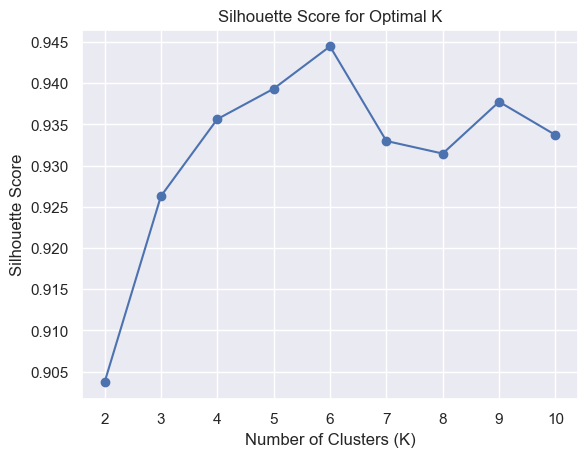

In [90]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fit KMeans for a range of K values
k_values = range(2, 11)
silhouette_scores = []
location_columns = ['Longitude', 'Latitude']

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df[location_columns])
    silhouette_scores.append(silhouette_score(df[location_columns], labels))

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Choose the K that maximizes the silhouette score, corresponding to the peak in the silhouette score plot.

Finding the Best Number of Clusters (K) with K-Means:

- Experimenting with K Values: We'll try out different numbers of clusters (represented by K) for the K-Means algorithm.
- Measuring Cluster Quality: For each K value, we'll calculate a score that reflects how well the data points fit within their assigned clusters. This score is called the sum of squared distances. It basically adds up the squared distances of each data point to its closest cluster center.
- Finding the Sweet Spot: We'll plot the sum of squared distances for each K value. Ideally, the graph will show a clear "elbow" where the decrease in the score slows down significantly. This elbow point indicates the optimal number of clusters (K) for our data.

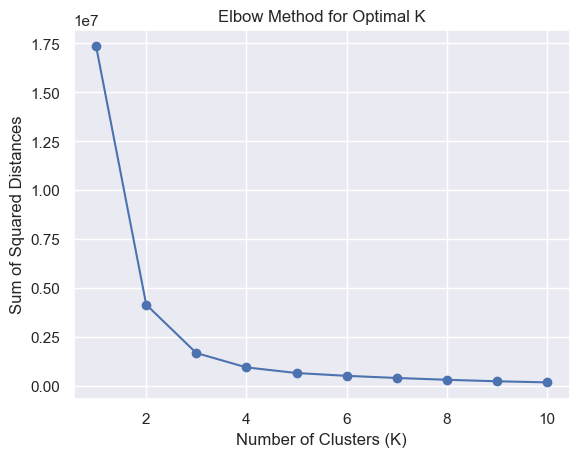

In [91]:
k_values = range(1, 11)
inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[location_columns])
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

The K-Means clustering algorithm was employed to generate a new feature named "LocationCluster." This process involved iteratively grouping data points in the two-dimensional space defined by the "Latitude" and "Longitude" features. We experimented with a range of six possible cluster configurations (K = 6). This approach aims to identify distinct geographical regions within the dataset based on the distribution of restaurants.

In [92]:
from sklearn.cluster import KMeans

K=6

kmeans = KMeans(n_clusters=K, random_state=42)
df['LocationCluster'] = kmeans.fit_predict(df[location_columns])

In [93]:
df['LocationCluster'].value_counts()

LocationCluster
0    8316
2     557
1     429
4     116
3      64
5      60
Name: count, dtype: int64

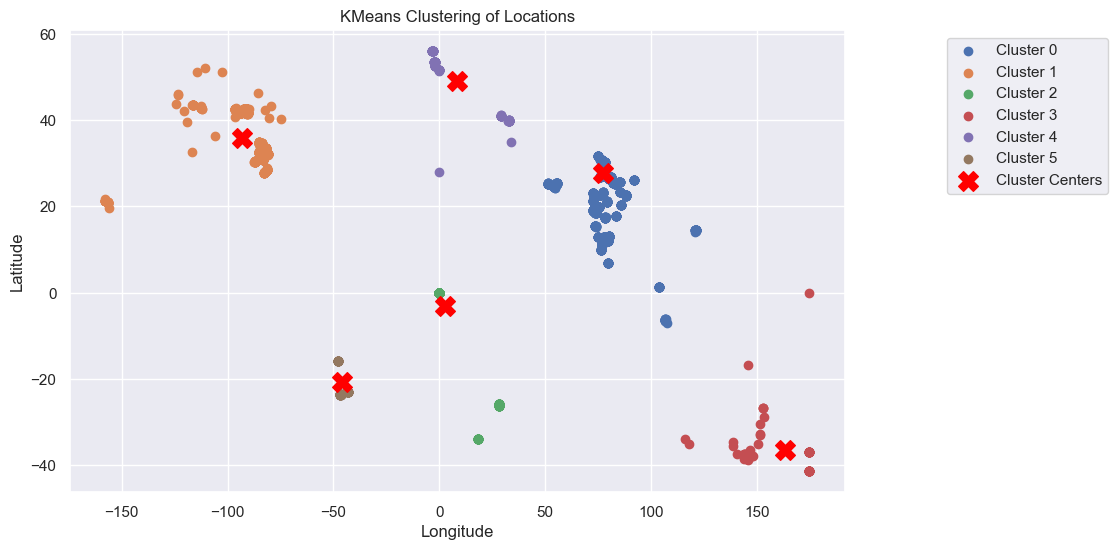

In [94]:
plt.figure(figsize=(10, 6))

for cluster in range(K):
    cluster_data = df[df['LocationCluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}')

# Plotting cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Cluster Centers')

plt.title('KMeans Clustering of Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1)) 
plt.show()

In [95]:
cols_to_drop.append('Longitude')
cols_to_drop.append('Latitude')
print(f"Columns to drop: {cols_to_drop}")

Columns to drop: ['Restaurant Name', 'Locality Verbose', 'Locality', 'Country', 'Rating color', 'Longitude', 'Latitude']


### Grouping and Aggregating Categories based on 'Cuisines' feature

In [96]:

all_cuisines = set()
for cuisines in df['Cuisines'].str.split(', '):
    all_cuisines.update(cuisines)


for cuisine in all_cuisines:
    df[cuisine] = df['Cuisines'].apply(lambda x: 1 if cuisine in x else 0)

cols_to_drop.append('Cuisines')

In [97]:
display(df[list(all_cuisines)])

,Coffee and Tea,Rajasthani,Moroccan,American,Tapas,Biryani,Hawaiian,Bengali,Teriyaki,South African,...,French,Ramen,Soul Food,Fast Food,Izgara,Steak,Naga,International,Gujarati,Lebanese
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Drop unnecessary columns

In [98]:
df.select_dtypes(include='object').columns.tolist()

['Restaurant Name',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Rating color',
 'Country']

In [99]:
print(f"Following columns: {cols_to_drop} will be dropped.")
df.drop(cols_to_drop, axis=1, inplace=True)
print(f"The new dimension of the dataset: {df.shape}")

Following columns: ['Restaurant Name', 'Locality Verbose', 'Locality', 'Country', 'Rating color', 'Longitude', 'Latitude', 'Cuisines'] will be dropped.
The new dimension of the dataset: (9542, 159)


In [100]:
df.head()

,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,...,French,Ramen,Soul Food,Fast Food,Izgara,Steak,Naga,International,Gujarati,Lebanese
0,162,73,1100,0,1,0,0,3,4.8,1,...,1,0,0,0,0,0,0,0,0,0
1,162,73,1200,0,1,0,0,3,4.5,1,...,0,0,0,0,0,0,0,0,0,0
2,162,75,4000,0,1,0,0,4,4.4,5,...,0,0,0,0,0,0,0,0,0,0
3,162,75,1500,0,0,0,0,4,4.9,1,...,0,0,0,0,0,0,0,0,0,0
4,162,75,1500,0,1,0,0,4,4.8,1,...,0,0,0,0,0,0,0,0,0,0


## Removing outliers

In [102]:
features_with_outliers = ['Average Cost for two', 'Aggregate rating','Votes']
features_with_outliers

['Average Cost for two', 'Aggregate rating', 'Votes']

In [103]:
from scipy.stats import zscore

z = np.abs(zscore(df[features_with_outliers]))
z

,Average Cost for two,Aggregate rating,Votes
0,0.006221,1.407683,0.365493
1,0.000020,1.209860,1.009408
2,0.173592,1.143919,0.263210
3,0.018581,1.473624,0.484048
4,0.018581,1.407683,0.167901
...,...,...,...
9546,0.069465,0.946096,1.467355
9547,0.067915,1.012037,2.039208
9548,0.063885,0.682332,1.172130
9549,0.066985,0.880155,1.730035


In [104]:
df_new = df[(z<3).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")

df = df_new.copy()
df

189 rows with outliers were deleted.
This represent 1.98% of the data.
In the new dataset there are 9353 rows and 159 columns.


,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,...,French,Ramen,Soul Food,Fast Food,Izgara,Steak,Naga,International,Gujarati,Lebanese
0,162,73,1100,0,1,0,0,3,4.8,1,...,1,0,0,0,0,0,0,0,0,0
1,162,73,1200,0,1,0,0,3,4.5,1,...,0,0,0,0,0,0,0,0,0,0
2,162,75,4000,0,1,0,0,4,4.4,5,...,0,0,0,0,0,0,0,0,0,0
3,162,75,1500,0,0,0,0,4,4.9,1,...,0,0,0,0,0,0,0,0,0,0
4,162,75,1500,0,1,0,0,4,4.8,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,139,80,11,0,0,0,3,4.1,5,...,0,0,0,0,0,0,0,0,0,0
9547,208,139,105,11,0,0,0,3,4.2,5,...,0,0,0,0,0,0,0,0,0,0
9548,208,139,170,11,0,0,0,4,3.7,2,...,0,0,0,0,0,0,0,0,0,0
9549,208,139,120,11,0,0,0,4,4.0,5,...,0,0,0,0,0,0,0,0,0,0


Our approach to outlier management prioritized minimizing data loss while addressing potential issues. Considering the limitation of not exceeding a 10% data loss threshold, we opted for a selective strategy. Through univariate analysis, we identified continuous variables with outliers.  For these specific variables, outliers exceeding a threshold of 3 standard deviations from the mean were removed. This measured approach resulted in a minimal data loss of only 1.98%. Consequently, the current dataset maintains a substantial size of 9,353 rows and 159 columns, ensuring a balance between data integrity and information preservation.

 Skewness Correction

In [105]:
df_skew = df.drop(list(all_cuisines),axis=1).skew().sort_values(ascending=False).to_frame("Skew")
df_skew

,Skew
Is delivering now,16.497854
RestaurantName_enc,4.461104
Average Cost for two,3.620465
LocationCluster,3.539884
Votes,3.219845
Country Code,3.095193
Currency,2.906753
Has Table booking,2.380822
Has Online delivery,1.118600
Price range,0.933887


Our analysis identified features exhibiting skewness, a statistical property indicating a data distribution is not symmetrical. To mitigate the potential impact of skewness on subsequent modeling techniques, we will employ a selection strategy. Features with a skewness coefficient exceeding an absolute value of 0.5 will be targeted for transformation. This process aims to normalize the distribution of these features by applying appropriate transformation methods. This approach will ensure a more balanced representation of the data within each feature.

In [106]:
skew_columns = df_skew[abs(df_skew['Skew']) > 0.5].index.to_list()
skew_columns = sorted(skew_columns)
skew_columns

['Aggregate rating',
 'Average Cost for two',
 'City',
 'Country Code',
 'Currency',
 'Has Online delivery',
 'Has Table booking',
 'Is delivering now',
 'LocationCluster',
 'Price range',
 'RestaurantName_enc',
 'Votes']

Our focus will be on the following numerical columns exhibiting skewness: "Aggregate Rating," "Average Cost for Two," and "Votes."

In [107]:
skew_columns = ['Aggregate rating', 'Average Cost for two', 'Votes']
skew_columns

['Aggregate rating', 'Average Cost for two', 'Votes']

To address the skewness identified in specific features, we will explore the application of several transformation methods. These methods aim to normalize the distribution of the data, making it more suitable for subsequent modeling techniques. The features targeted for transformation include "Aggregate Rating," "Average Cost for Two" (excluding the target variable role for now), and "Votes."

We will evaluate three potential transformation methods:
- Cube-Root Transformation: This method involves raising each data point in the feature to the power of one-third.
- Square-Root Transformation: This method involves raising each data point in the feature to the power of one-half.
- Logarithmic Transformation: This method applies the natural logarithm (base-e logarithm) to each data point in the feature.
- Following the application of each transformation method, we will compare the resulting skewness coefficients. This comparison will allow us to select the most effective transformation technique for each feature. The chosen method will be the one that reduces the skewness coefficient to a value closest to zero, indicating a more symmetrical distribution.

In [108]:
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df[col])
    df_transformed[f"{col}_log"] = np.log(df[col])
    
# Adding the other columns
df_transformed = pd.concat([df_transformed, df[skew_columns]], axis=1)

In [109]:
# Comparing which transform method give better results
df_comp = df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

# Reset the index and identify the feature
df_comp.reset_index(inplace=True)
df_comp['feature'] = df_comp['index'].str.extract(r'^(.*)_.*')
df_comp['Skewness_abs'] = abs(df_comp['Skewness'])

# Drop the records with no valid skewness
df_comp = df_comp[~df_comp.Skewness.isnull()]

# Find the indexes of the rows with the minimum 'Skewness_abs' values
min_indices = df_comp.groupby('feature')['Skewness_abs'].idxmin()

# Select the rows corresponding to the minimum values in Skewness_abs,
low_skewness = df_comp.loc[min_indices]
low_skewness

,index,Skewness,feature,Skewness_abs
8,Aggregate rating_sqrt,-1.191196,Aggregate rating,1.191196
6,Average Cost for two_cbrt,0.477734,Average Cost for two,0.477734
2,Votes_cbrt,0.690512,Votes,0.690512


In [110]:
df_comp

,index,Skewness,feature,Skewness_abs
0,Votes_sqrt,1.451853,Votes,1.451853
2,Votes_cbrt,0.690512,Votes,0.690512
3,Votes,3.219845,NaN,3.219845
4,Average Cost for two_sqrt,1.228444,Average Cost for two,1.228444
6,Average Cost for two_cbrt,0.477734,Average Cost for two,0.477734
7,Average Cost for two,3.620465,NaN,3.620465
8,Aggregate rating_sqrt,-1.191196,Aggregate rating,1.191196
10,Aggregate rating_cbrt,-1.242807,Aggregate rating,1.242807
11,Aggregate rating,-0.939831,NaN,0.939831


Following the evaluation of various transformation techniques for skewed features, the optimal approaches have been identified:
- Average Cost for Two and Votes: The cube-root transformation method demonstrated the most effective reduction in skewness for these features. This method transforms the data by raising each value to the power of one-third.
- Aggregate Rating: Analysis revealed that no transformation is necessary for the "Aggregate Rating" feature. This suggests that the current distribution of this feature is already suitable for subsequent modeling techniques.

In [111]:
df['Average Cost for two'] = np.cbrt(df['Average Cost for two'])
df['Votes'] = np.cbrt(df['Votes'])

In [112]:
df[skew_columns].skew()

Aggregate rating       -0.939831
Average Cost for two    0.477734
Votes                   0.690512
dtype: float64

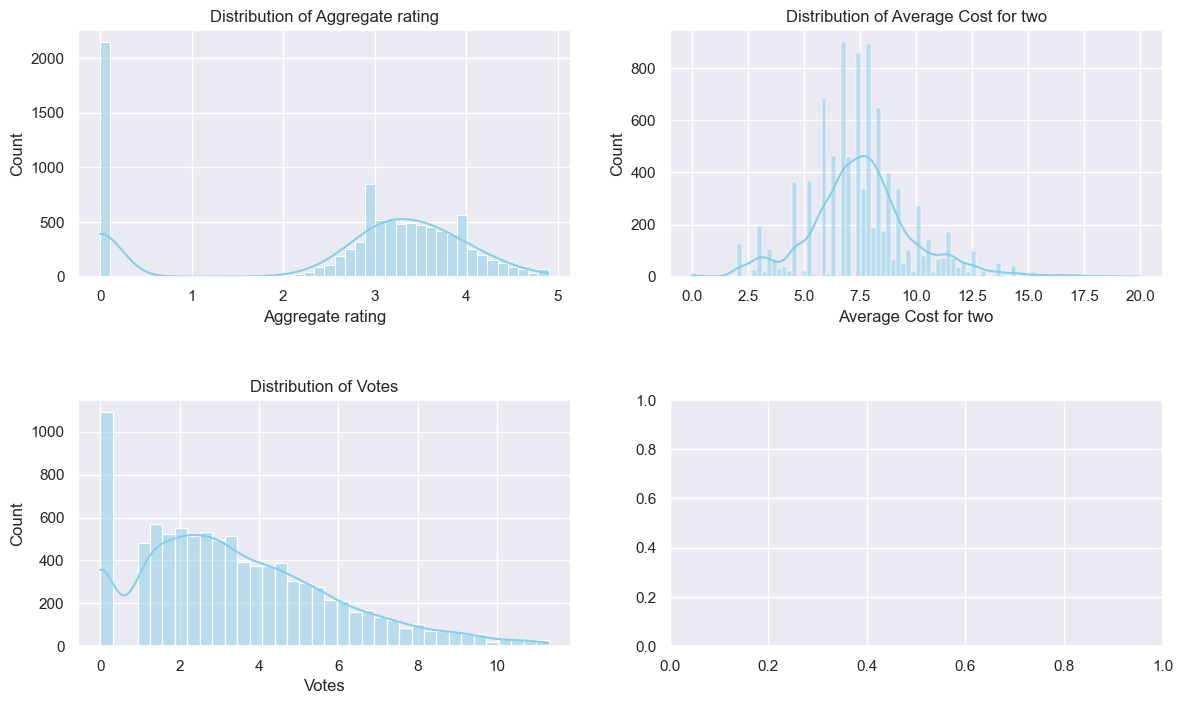

In [113]:
# Visualizing the distribution of the columns after removing skewness
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
for ax, column in zip(axs.flat, skew_columns):
    sns.histplot(data=df, x=column, ax=ax, kde=True, color='skyblue')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

## Feature Scaling using Standard Scalarization

#### Separating features and label

In [114]:
x = df.drop(['Average Cost for two'], axis=1)
y = df['Average Cost for two']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")
display(x.head())
display(y.head())

Feature Dimension = (9353, 158)
Label Dimension = (9353,)


,Country Code,City,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,...,French,Ramen,Soul Food,Fast Food,Izgara,Steak,Naga,International,Gujarati,Lebanese
0,162,73,0,1,0,0,3,4.8,1,6.796884,...,1,0,0,0,0,0,0,0,0,0
1,162,73,0,1,0,0,3,4.5,1,8.391942,...,0,0,0,0,0,0,0,0,0,0
2,162,75,0,1,0,0,4,4.4,5,6.463304,...,0,0,0,0,0,0,0,0,0,0
3,162,75,0,0,0,0,4,4.9,1,7.146569,...,0,0,0,0,0,0,0,0,0,0
4,162,75,0,1,0,0,4,4.8,1,6.118033,...,0,0,0,0,0,0,0,0,0,0


0    10.322801
1    10.626586
2    15.874011
3    11.447142
4    11.447142
Name: Average Cost for two, dtype: float64

#### Separating features for classification model to predict Price range

In [115]:
x2 = df.drop(['Price range'], axis=1)
y2 = df['Price range']

print(f"Feature Dimension = {x2.shape}")
print(f"Label Dimension = {y2.shape}")
display(x2.head())
display(y2.unique())

Feature Dimension = (9353, 158)
Label Dimension = (9353,)


,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating text,Votes,...,French,Ramen,Soul Food,Fast Food,Izgara,Steak,Naga,International,Gujarati,Lebanese
0,162,73,10.322801,0,1,0,0,4.8,1,6.796884,...,1,0,0,0,0,0,0,0,0,0
1,162,73,10.626586,0,1,0,0,4.5,1,8.391942,...,0,0,0,0,0,0,0,0,0,0
2,162,75,15.874011,0,1,0,0,4.4,5,6.463304,...,0,0,0,0,0,0,0,0,0,0
3,162,75,11.447142,0,0,0,0,4.9,1,7.146569,...,0,0,0,0,0,0,0,0,0,0
4,162,75,11.447142,0,1,0,0,4.8,1,6.118033,...,0,0,0,0,0,0,0,0,0,0


array([3, 4, 2, 1], dtype=int64)

### Scaling Data

#### Scaling the data for regression model to predict Average Cost for two

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

print(f"\n\n{'*'*30} x features for regression model 1 to predict Average Cost for two {'*'*30}")
display(x.head())



****************************** x features for regression model 1 to predict Average Cost for two ******************************


,Country Code,City,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating text,Votes,...,French,Ramen,Soul Food,Fast Food,Izgara,Steak,Naga,International,Gujarati,Lebanese
0,2.564131,-0.206781,-4.341104,2.744769,-0.586528,-0.060402,1.359582,1.430283,-0.451991,1.375222,...,18.249266,-0.010341,-0.010341,-0.516887,-0.014625,-0.078993,-0.029259,-0.046292,-0.034314,-0.084301
1,2.564131,-0.206781,-4.341104,2.744769,-0.586528,-0.060402,1.359582,1.232192,-0.451991,2.029151,...,-0.054797,-0.010341,-0.010341,-0.516887,-0.014625,-0.078993,-0.029259,-0.046292,-0.034314,-0.084301
2,2.564131,-0.118576,-4.341104,2.744769,-0.586528,-0.060402,2.476604,1.166161,1.932034,1.238464,...,-0.054797,-0.010341,-0.010341,-0.516887,-0.014625,-0.078993,-0.029259,-0.046292,-0.034314,-0.084301
3,2.564131,-0.118576,-4.341104,-0.364329,-0.586528,-0.060402,2.476604,1.496314,-0.451991,1.518583,...,-0.054797,-0.010341,-0.010341,-0.516887,-0.014625,-0.078993,-0.029259,-0.046292,-0.034314,-0.084301
4,2.564131,-0.118576,-4.341104,2.744769,-0.586528,-0.060402,2.476604,1.430283,-0.451991,1.096913,...,-0.054797,-0.010341,-0.010341,-0.516887,-0.014625,-0.078993,-0.029259,-0.046292,-0.034314,-0.084301


#### Scaling the data for classification model to predict Price range

In [117]:
scaler2 = StandardScaler()

# Scaling data 
x2 = pd.DataFrame(scaler2.fit_transform(x2), columns = x2.columns)

print(f"\n\n{'*'*30} x2 features for regression model 2 to predict Price range {'*'*30}")
display(x2.head())



****************************** x2 features for regression model 2 to predict Price range ******************************


,Country Code,City,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating text,Votes,...,French,Ramen,Soul Food,Fast Food,Izgara,Steak,Naga,International,Gujarati,Lebanese
0,2.564131,-0.206781,1.159336,-4.341104,2.744769,-0.586528,-0.060402,1.430283,-0.451991,1.375222,...,18.249266,-0.010341,-0.010341,-0.516887,-0.014625,-0.078993,-0.029259,-0.046292,-0.034314,-0.084301
1,2.564131,-0.206781,1.288573,-4.341104,2.744769,-0.586528,-0.060402,1.232192,-0.451991,2.029151,...,-0.054797,-0.010341,-0.010341,-0.516887,-0.014625,-0.078993,-0.029259,-0.046292,-0.034314,-0.084301
2,2.564131,-0.118576,3.520944,-4.341104,2.744769,-0.586528,-0.060402,1.166161,1.932034,1.238464,...,-0.054797,-0.010341,-0.010341,-0.516887,-0.014625,-0.078993,-0.029259,-0.046292,-0.034314,-0.084301
3,2.564131,-0.118576,1.637656,-4.341104,-0.364329,-0.586528,-0.060402,1.496314,-0.451991,1.518583,...,-0.054797,-0.010341,-0.010341,-0.516887,-0.014625,-0.078993,-0.029259,-0.046292,-0.034314,-0.084301
4,2.564131,-0.118576,1.637656,-4.341104,2.744769,-0.586528,-0.060402,1.430283,-0.451991,1.096913,...,-0.054797,-0.010341,-0.010341,-0.516887,-0.014625,-0.078993,-0.029259,-0.046292,-0.034314,-0.084301


## Muticollinearity Analysis and Feature Selection

Checking VIF for regression model 1 to predict Average Cost for two

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
95,Malaysian,32.260764
106,Malay,31.944276
139,Indian,14.534695
120,North Indian,12.918888
121,African,4.451196
...,...,...
132,Canadian,1.002837
100,Oriya,1.002388
109,Cuisine Varies,1.002171
31,Sunda,NaN


VIF analysis identified multicollinearity in "Malaysian," "Malay," "Indian," and "North Indian" (VIF > 10). To address this, we will iteratively remove features with the highest VIF until the issue is resolved. Following this, we will analyze the remaining features' correlation with the target variable.

In [125]:
cor=df.corr()

In [126]:
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A']=='Average Cost for two') &  (corr_df['Feature B'] != 'Average Cost for two')]

,Feature A,Feature B,Corr coef
176,Average Cost for two,Price range,0.602708
179,Average Cost for two,Has Table booking,0.550753
236,Average Cost for two,Continental,0.329490
310,Average Cost for two,North Indian,0.249141
327,Average Cost for two,Votes,0.239757
...,...,...,...
24599,Average Cost for two,Street Food,-0.165691
24643,Average Cost for two,LocationCluster,-0.313914
24647,Average Cost for two,Country Code,-0.452451
24653,Average Cost for two,Sunda,NaN


In [127]:
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'Price range') & (corr_df['Feature B'] != 'Price range')]

,Feature A,Feature B,Corr coef
175,Price range,Average Cost for two,0.602708
185,Price range,Votes,0.514599
190,Price range,Has Table booking,0.504247
200,Price range,Aggregate rating,0.427179
260,Price range,Continental,0.306914
...,...,...,...
24602,Price range,Street Food,-0.167068
24623,Price range,Fast Food,-0.192589
24642,Price range,Locality_enc,-0.300045
24663,Price range,Sunda,NaN


In [128]:
corr_df[(corr_df['Feature A'] == 'Average Cost for two') & (corr_df['Feature B'].isin(['Malaysian', 'Malay', 'Indian', 'North Indian'])) ]

,Feature A,Feature B,Corr coef
310,Average Cost for two,North Indian,0.249141
362,Average Cost for two,Indian,0.222435
1115,Average Cost for two,Malaysian,0.070323
1216,Average Cost for two,Malay,0.064657


In [130]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
120,African,4.450444
107,Australian,4.270792
124,Modern Australian,4.096397
9,Votes,3.672994
90,Turkish Pizza,3.514644
...,...,...
131,Canadian,1.002816
100,Oriya,1.002271
108,Cuisine Varies,1.002131
31,Sunda,NaN


Removing "Malay" and "Indian" features resolved multicollinearity (VIF < 10). We can now proceed to model building.

## Balancing the Dataset for Classification model

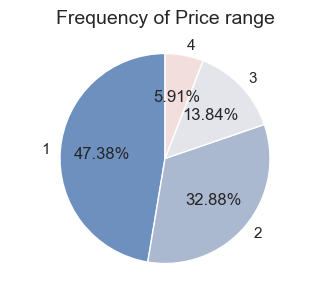

In [132]:
target_counts = y2.value_counts()

# Create a pie plot
sns.set(font_scale=1)
sns.set_palette('vlag')
plt.figure(figsize=(4, 3))
plt.pie(target_counts, labels=['1','2','3', '4'], autopct='%1.2f%%', startangle=90)

plt.title("Frequency of Price range", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [133]:
x2.shape

(9353, 158)

In [134]:
target_counts

Price range
1    4431
2    3075
3    1294
4     553
Name: count, dtype: int64

In [135]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, Y = SM.fit_resample(x2, y2)

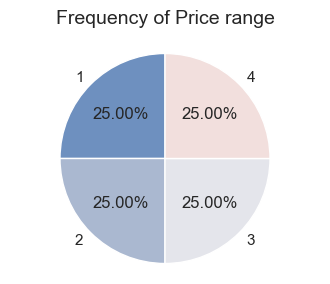

In [136]:
target_counts = Y.value_counts()

# Create a pie plot
plt.figure(figsize=(4, 3))
plt.pie(target_counts, labels=['1','2','3', '4'], autopct='%1.2f%%', startangle=90)

plt.title("Frequency of Price range", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [137]:
X.shape

(17724, 158)

## Modeling for predicting Average Cost for two

### Finding the best random state

In [140]:
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Adapt to Regression Models
        acc = r2_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]

In [141]:
model = LinearRegression()
random_state, acc = find_best_random_state(model, x, y) 
print(f"Maximum r2 score is {round(acc,4)} at random_state {random_state}")

Maximum r2 score is 0.8387 at random_state 154


In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (6547, 156)
x_test shape:   (2806, 156)
y_train shape:  (6547,)
y_test shape:   (2806,)


## Linear Regression

In [162]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id':'LinearRegression', 'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }

LR coef_        : [-1.29110138e+00  7.38487659e-04  2.24549591e-01  3.05364895e-01
  3.13138363e-02  5.53849537e-03  1.44027099e+00  2.69879181e-02
  9.32577399e-03  9.21645425e-02  1.33113975e-01 -1.54868622e-02
 -3.24890545e-01 -1.44769028e-02  1.68357279e-02  3.41458304e-02
  3.46553700e-02 -1.13664015e-02  8.73538678e-03 -9.49496292e-03
  2.92370706e-02 -1.31047906e-02  3.33003028e-02  3.03082979e-03
 -2.74586716e-03 -1.61406690e-02 -1.64410801e-02 -5.60845765e-02
 -1.32848682e-01  1.04113909e-02 -1.04773525e-03 -2.53598565e+13
  2.38839144e-02  9.60655295e-03  1.34791714e-02 -5.29956752e-05
  1.67161342e-02 -3.13093924e-02 -1.82945653e-03  1.87131409e-02
  1.46834052e-01  2.03976071e-02 -2.05924711e-02 -6.47836723e-02
  1.34033188e-02 -1.33039399e-02  5.94874592e-03 -7.40461474e-03
  4.69567288e-02  8.68613782e-02 -1.73575107e-02 -1.89398787e-02
 -1.11436527e-02  2.11493324e-02 -1.38064065e+13 -1.11216085e-02
  9.34359160e-03 -9.40203975e-03 -1.94691179e-02  9.19799778e-03
  1.606

# Random Forest Regressor

In [150]:
model = RandomForestRegressor()

# Define the hyperparameter grid  
param_dist = {'n_estimators': np.arange(10, 200, 10),  # number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),   # minimum samples required for a leaf
    'bootstrap': [True, False]}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=random_state)
# Fit the model 
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=154)

In [151]:
random_search.best_estimator_

RandomForestRegressor(max_depth=70, min_samples_split=9, n_estimators=30)

In [163]:
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_score = random_search.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)

# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'id':'Random Forest Regressor', 'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }

Best parameters : {'n_estimators': 30, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_depth': 70, 'bootstrap': True}
Best score : 0.9068819637803978
Best Estimator:  RandomForestRegressor(max_depth=70, min_samples_split=9, n_estimators=30)
********** E R R O R **********
Mean squared error: 0.5529
Root Mean squared error: 0.7436
Cross-validation results (R2): 0.9068819637803978
Average R2: 0.9069
R2_Score(test): 0.9051


# Decision Tree Regressor

In [164]:
dtr = DecisionTreeRegressor(random_state=random_state)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Decision Tree Regressor', 'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }

********** E R R O R **********
Mean squared error: 0.9302
Root Mean squared error: 0.9645
Cross-validation results (R2): [-0.52707769  0.78292317  0.77177083  0.81014729 -0.16602685]
Average R2: 0.3343
R2_Score(test): 0.8403


# K Neighbors Regressor

In [165]:
knn = KNN()
knn.fit(x_train, y_train)

# Predict the value
y_pred = knn.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(knn, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = knn.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'K Neighbors Regressor', 'Model': knn, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }

********** E R R O R **********
Mean squared error: 1.6732
Root Mean squared error: 1.2935
Cross-validation results (R2): [-0.2138798   0.67978365  0.73571367  0.72144519  0.31938276]
Average R2: 0.4485
R2_Score(test): 0.7128


## Gradient Boosting Regressor

In [166]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

# Predict the value
y_pred = gbr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(gbr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = gbr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Gradient Boosting Regressor', 'Model': gbr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }

********** E R R O R **********
Mean squared error: 0.5909
Root Mean squared error: 0.7687
Cross-validation results (R2): [0.19730529 0.87109032 0.86843626 0.87281786 0.66402458]
Average R2: 0.6947
R2_Score(test): 0.8986


# Lasso Reggression

In [167]:
lasso = Lasso()
lasso.fit(x_train, y_train)

# Predict the value
y_pred = lasso.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lasso, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = lasso.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Lasso', 'Model': lasso, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }

********** E R R O R **********
Mean squared error: 4.3227
Root Mean squared error: 2.0791
Cross-validation results (R2): [-0.0508365   0.21808668  0.35018174  0.25118385  0.25371358]
Average R2: 0.2045
R2_Score(test): 0.2579


# Ridge

In [161]:
rd = Ridge()
rd.fit(x_train, y_train)

# Predict the value
y_pred = rd.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(rd, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = rd.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'Ridge', 'Model': rd, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }

********** E R R O R **********
Mean squared error: 0.9419
Root Mean squared error: 0.9705
Cross-validation results (R2): [-0.63258394  0.83829704  0.83345323  0.82532053  0.49022365]
Average R2: 0.4709
R2_Score(test): 0.8383


# SVR

In [168]:
# Create the Ridge model
svr = SVR()
svr.fit(x_train, y_train)

# Predict the value
y_pred = svr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(svr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = svr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'id': 'SVR', 'Model': svr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }

********** E R R O R **********
Mean squared error: 1.5808
Root Mean squared error: 1.2573
Cross-validation results (R2): [0.1213144  0.69868861 0.772074   0.76026476 0.53948766]
Average R2: 0.5784
R2_Score(test): 0.7286


In [169]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [170]:
parameter={'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [174]:
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Vary the number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Vary the maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),  # Vary the minimum samples required for a leaf
    'bootstrap': [True, False]}  # Bootstrap sampling


# Build the model 
model = RandomForestRegressor()

# Perform search with cross validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=random_state)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=154, scoring='neg_mean_squared_error')

In [175]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestRegressor model:")
best_params

Best Parameters for RandomForestRegressor model:


{'n_estimators': 30,
 'min_samples_split': 9,
 'min_samples_leaf': 1,
 'max_depth': 70,
 'bootstrap': True}

In [176]:
best_model

RandomForestRegressor(max_depth=70, min_samples_split=9, n_estimators=30)

# Final Regression Model to predict Average Cost for two

In [177]:
best_model = RandomForestRegressor(max_depth=70, min_samples_split=9, n_estimators=30)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 90.79%


Saving the model

In [181]:
import joblib
joblib.dump(best_model, "zomato.pkl")

['zomato.pkl']